In [5]:
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql

In [6]:
con = pymysql.connect(host="localhost", user="gabic", passwd="1234", db="doenca_renal_cronica")
con.select_db('doenca_renal_cronica')
cursor = con.cursor()  
cursor.connection.autocommit(True)

In [7]:
#criando os dataframes por tabela 
dados_consulta = pd.read_sql('SELECT * FROM doenca_renal_cronica.dados_consulta',con=con)
cidade = pd.read_sql('SELECT * FROM doenca_renal_cronica.cidade',con=con)
ubs = pd.read_sql('SELECT * FROM doenca_renal_cronica.ubs',con=con)
aval_funcao_renal = pd.read_sql('SELECT * FROM doenca_renal_cronica.aval_funcao_renal',con=con)
consulta_has = pd.read_sql('SELECT * FROM doenca_renal_cronica.consulta_has',con=con)
consulta_drc = pd.read_sql('SELECT * FROM doenca_renal_cronica.consulta_drc',con=con)
consulta_dm = pd.read_sql('SELECT * FROM doenca_renal_cronica.consulta_dm',con=con)
calculo_tfg = pd.read_sql('SELECT * FROM doenca_renal_cronica.calculo_tfg',con=con)
preparacao_trs = pd.read_sql('SELECT * FROM doenca_renal_cronica.preparacao_trs',con=con)
raca = pd.read_sql('SELECT * FROM doenca_renal_cronica.raca',con=con)
instrucao = pd.read_sql('SELECT * FROM doenca_renal_cronica.instrucao',con=con)
paciente = pd.read_sql('SELECT * FROM doenca_renal_cronica.paciente',con=con)
exame_fisico = pd.read_sql('SELECT * FROM doenca_renal_cronica.exame_fisico',con=con)
avaliacao_tratamento = pd.read_sql('SELECT * FROM doenca_renal_cronica.avaliacao_tratamento',con=con)
medicamento = pd.read_sql('SELECT * FROM doenca_renal_cronica.medicamento',con=con)
complicacao_funcao_renal = pd.read_sql('SELECT * FROM doenca_renal_cronica.complicacao_funcao_renal',con=con)

#dicionario com todas tabelas
dic = {'dados_consulta':dados_consulta,'cidade':cidade,'ubs':ubs,'aval_funcao_renal':aval_funcao_renal,
       'consulta_has':consulta_has,'consulta_drc':consulta_drc,'consulta_dm':consulta_dm,'calculo_tfg':calculo_tfg,
       'preparacao_trs':preparacao_trs,'raca':raca,'instrucao':instrucao,'paciente':paciente,'exame_fisico':exame_fisico,
       'avaliacao_tratamento':avaliacao_tratamento,'medicamento':medicamento,'complicacao_funcao_renal':complicacao_funcao_renal
      }

In [64]:
A=[]
for d in dic: 
    A.append(dic[d])
    
A=pd.concat(A, axis=1)
#A.replace(0,None, inplace=True)


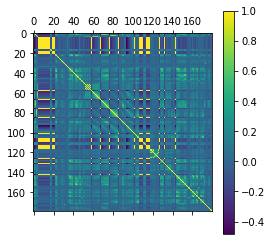

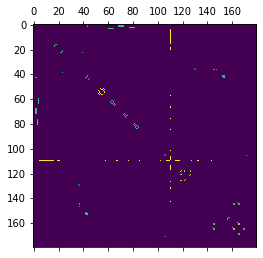

In [65]:
plt.matshow(A.corr())
plt.colorbar()

B=A.corr()
B=np.where(np.abs(B)<1.0,B, 0)
B=np.where(np.abs(B)>0.6,B, 0)
plt.matshow(B)

In [25]:
#informações sobre os dados 
for tabela in dic.keys():
    print(''+tabela+'')
    dic[tabela].info()
    print('\n')

dados_consulta
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7266 entries, 0 to 7265
Data columns (total 25 columns):
id_dados_consulta      7266 non-null int64
data_inicial           7266 non-null object
data_final             7266 non-null object
tempoAcomp             7266 non-null int64
total_consultas_drc    7266 non-null int64
total_consultas_dm     7266 non-null int64
total_consultas_has    7266 non-null int64
desfecho               7266 non-null object
desfecho_text          7266 non-null object
id_cidade              7266 non-null int64
id_afr                 7266 non-null int64
id_ubs                 7266 non-null int64
id_has                 7266 non-null int64
id_drc                 7266 non-null int64
id_dm                  7266 non-null int64
id_cfr                 7266 non-null int64
id_exame_fisico        7266 non-null int64
id_calculo_tfg         7266 non-null int64
id_preparacao_trs      7266 non-null int64
id_medicamento         7266 non-null int64
id_aval_tratam

In [26]:
#dic['dados_consulta']

In [27]:
#estaísticas
for i in dic.keys():
    for coluna in dic[i].columns:
        if coluna[0:3] !='dt' and coluna[0:2]!='id' and coluna[0:3] !='dat':
            print('Tabela que está sendo analisada:'+ i)
            print(dic[i][coluna].describe())
           
        

Tabela que está sendo analisada:dados_consulta
count    7266.000000
mean       12.356730
std        14.472973
min         0.000000
25%         0.000000
50%         5.000000
75%        22.000000
max        51.000000
Name: tempoAcomp, dtype: float64
Tabela que está sendo analisada:dados_consulta
count    7266.000000
mean        0.986375
std         1.921360
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        20.000000
Name: total_consultas_drc, dtype: float64
Tabela que está sendo analisada:dados_consulta
count    7266.000000
mean        1.308148
std         2.590710
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max       124.000000
Name: total_consultas_dm, dtype: float64
Tabela que está sendo analisada:dados_consulta
count    7266.00000
mean        1.02725
std         1.99499
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max        26.00000
Name: total_consultas_has, dtype

count     7266
unique     417
top        0.0
freq      6717
Name: dt_pth_intacto_final, dtype: object
Tabela que está sendo analisada:aval_funcao_renal
count    7266.000000
mean       11.390713
std        14.109916
min         0.000000
25%         0.000000
50%         0.000000
75%        22.900000
max        75.700000
Name: vitaminaD_inicial, dtype: float64
Tabela que está sendo analisada:aval_funcao_renal
count     7266
unique    1094
top        0.0
freq      3969
Name: dt_vitaminaD_inicial, dtype: object
Tabela que está sendo analisada:aval_funcao_renal
count    7266.000000
mean        7.354261
std        13.542310
min         0.000000
25%         0.000000
50%         0.000000
75%        11.892500
max        90.000000
Name: vitaminaD_final, dtype: float64
Tabela que está sendo analisada:aval_funcao_renal
count     7266
unique     634
top        0.0
freq      5407
Name: dt_vitaminaD_final, dtype: object
Tabela que está sendo analisada:aval_funcao_renal
count    7266.000000
mean       

count    7266.000000
mean        0.193229
std         0.677706
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        26.000000
Name: total_1_2012, dtype: float64
Tabela que está sendo analisada:consulta_dm
count    7266.000000
mean        0.227911
std         0.709641
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        23.000000
Name: total_2_2012, dtype: float64
Tabela que está sendo analisada:consulta_dm
count    7266.000000
mean        0.291495
std         0.746325
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        24.000000
Name: total_1_2013, dtype: float64
Tabela que está sendo analisada:consulta_dm
count    7266.000000
mean        0.299752
std         0.653345
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: total_2_2013, dtype: float64
Tabela que está sendo analisada:consulta_dm
count    726

count    7266.000000
mean       58.339978
std       102.504981
min         0.000000
25%         0.000000
50%         0.000000
75%       114.000000
max       925.000000
Name: sodio_urinario_inicial, dtype: float64
Tabela que está sendo analisada:avaliacao_tratamento
count     7266
unique    1035
top        0.0
freq      5026
Name: dt_sodio_urinario_inicial, dtype: object
Tabela que está sendo analisada:avaliacao_tratamento
count    7266.000000
mean       77.550124
std        69.553454
min         0.000000
25%         0.000000
50%       135.000000
75%       140.000000
max       175.000000
Name: sodio_serico_inicial, dtype: float64
Tabela que está sendo analisada:avaliacao_tratamento
count     7266
unique    1327
top        0.0
freq      3231
Name: dt_sodio_serico_inicial, dtype: object
Tabela que está sendo analisada:avaliacao_tratamento
count    7266.000000
mean       36.492212
std        61.463932
min         0.000000
25%         0.000000
50%         0.000000
75%       133.000000
max  

count    7266.000000
mean        0.026697
std         0.267990
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.370000
Name: bilirrubina_inicial, dtype: float64
Tabela que está sendo analisada:complicacao_funcao_renal
count     7266
unique     203
top        0.0
freq      7052
Name: dt_bilirrubina_inicial, dtype: object
Tabela que está sendo analisada:complicacao_funcao_renal
count    7266.000000
mean        0.005304
std         0.179352
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        13.700000
Name: bilirrubina_final, dtype: float64
Tabela que está sendo analisada:complicacao_funcao_renal
count     7266
unique      24
top        0.0
freq      7243
Name: dt_bilirrubina_final, dtype: object
Tabela que está sendo analisada:complicacao_funcao_renal
count    7266.000000
mean      129.375248
std       204.374022
min         0.000000
25%         0.000000
50%         0.000000
75%       257.000000
m

/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


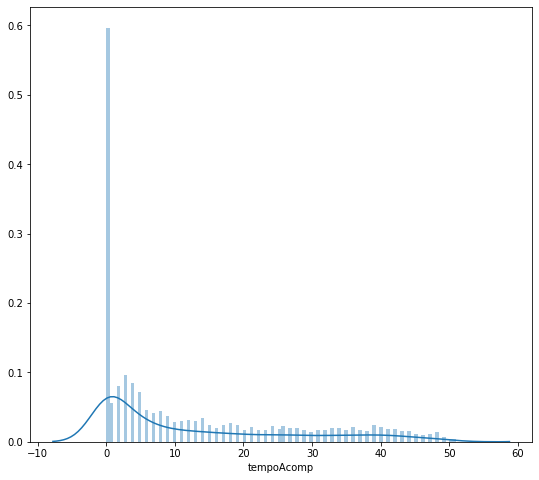

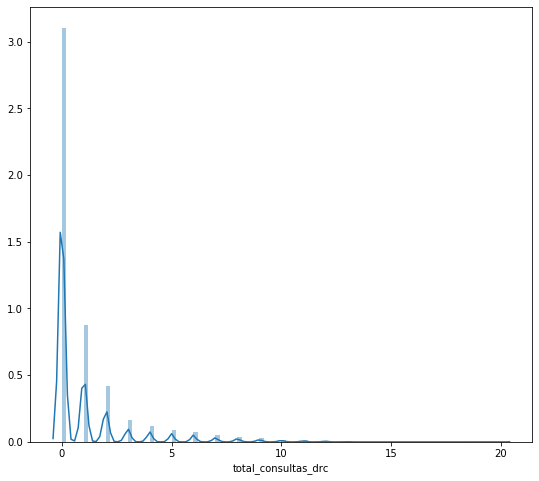

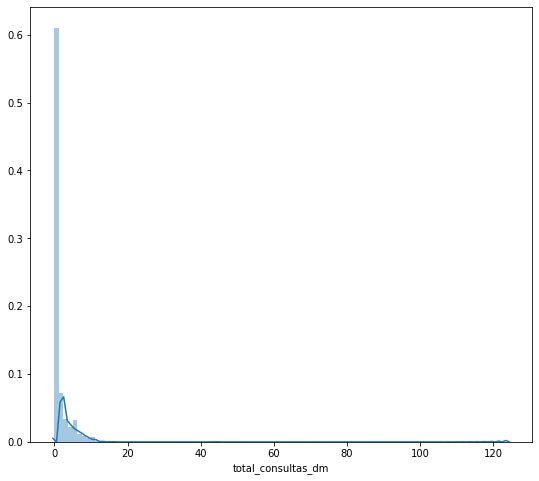

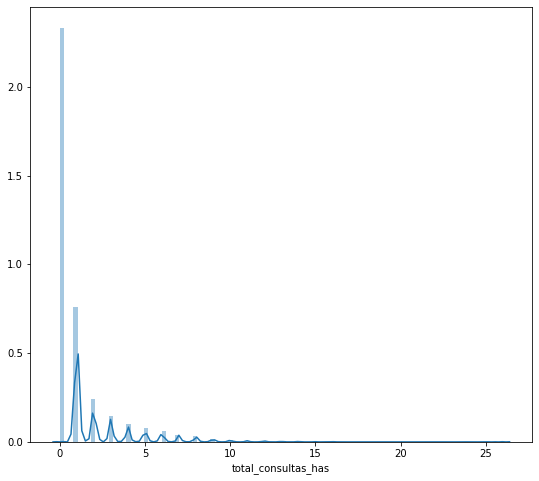

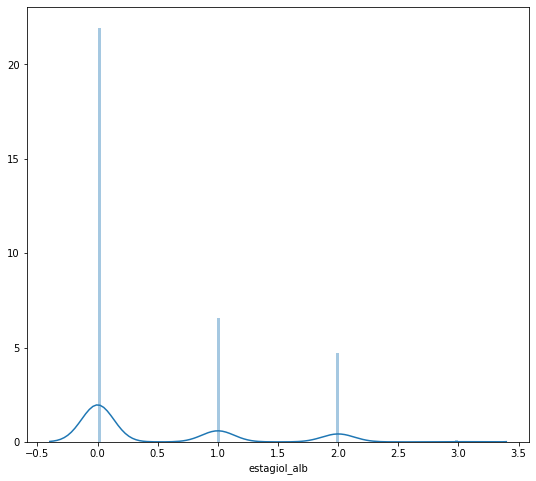

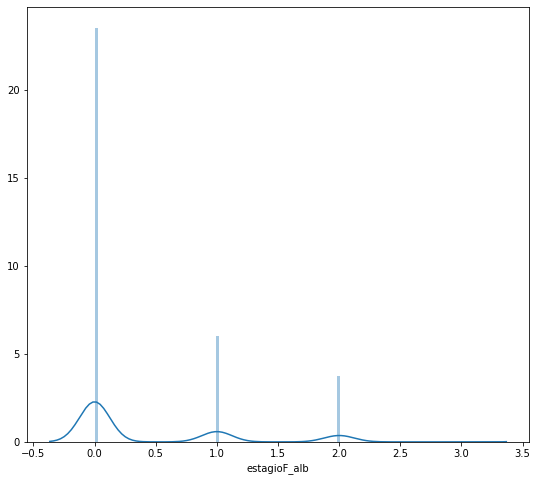

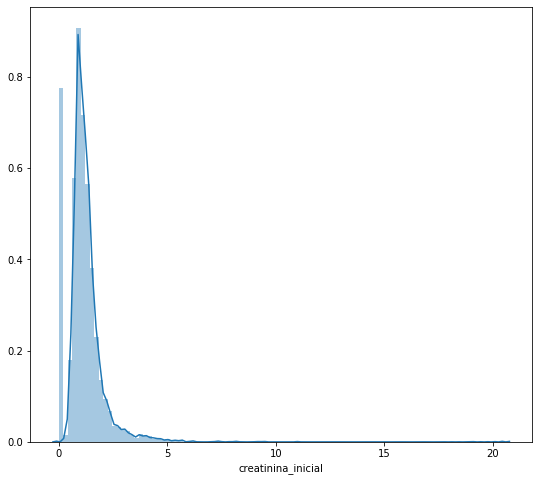

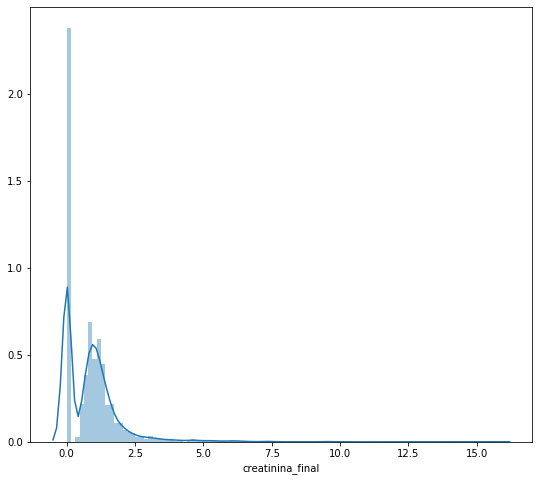

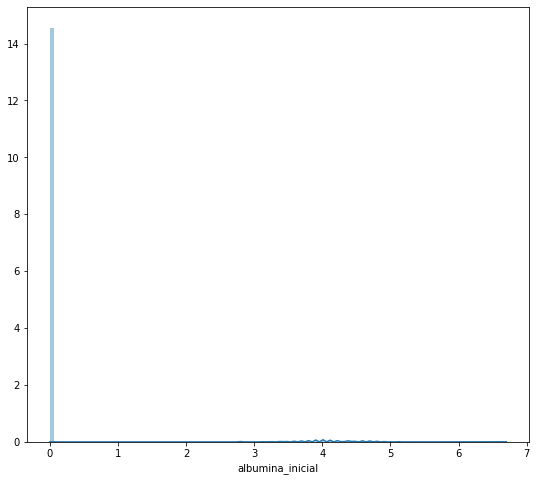

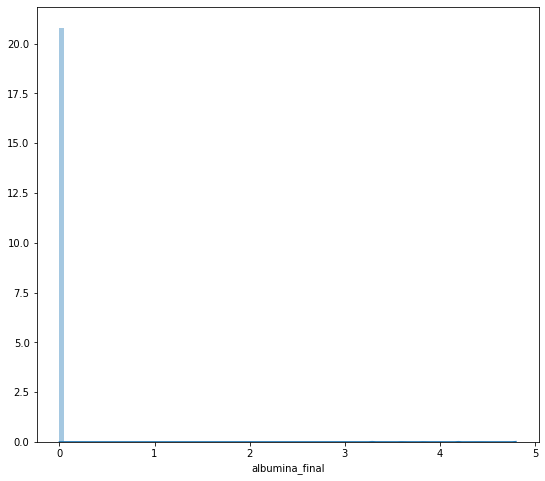

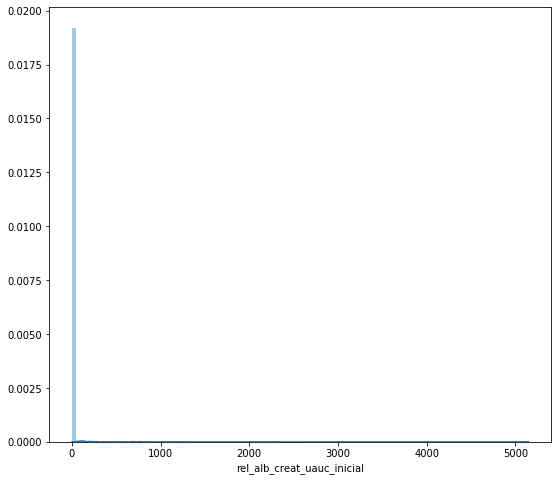

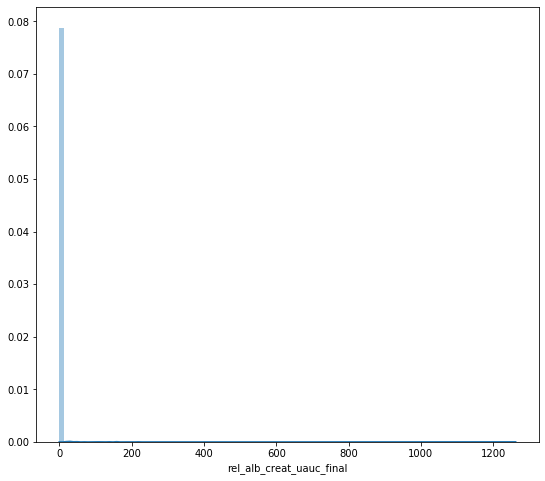

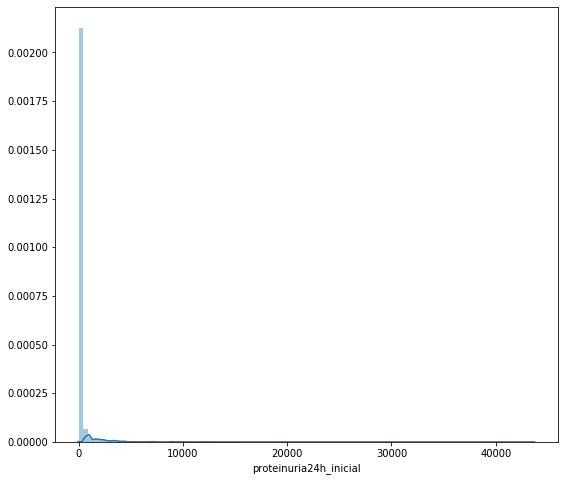

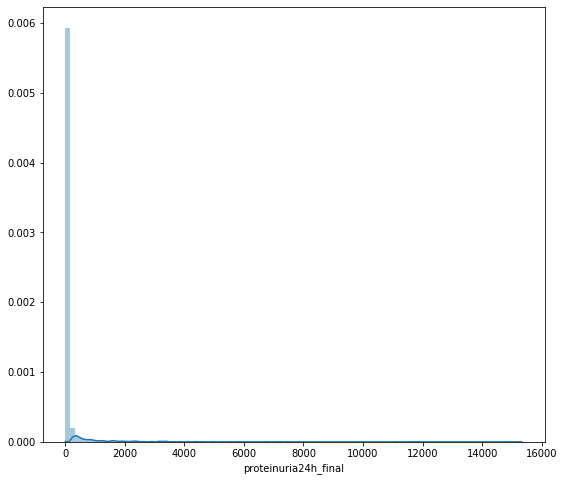

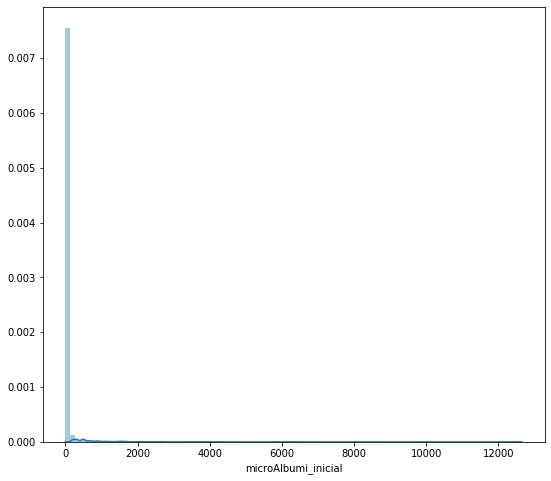

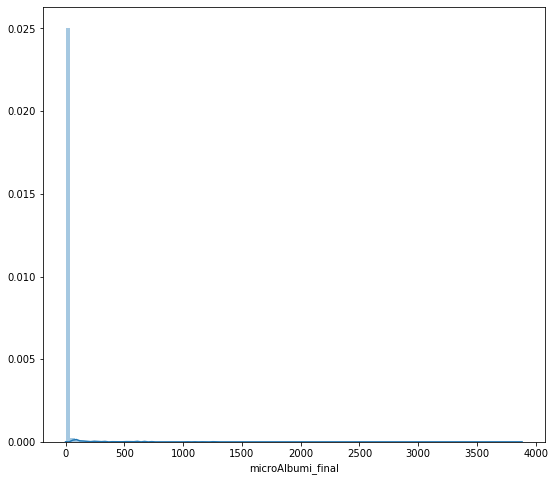

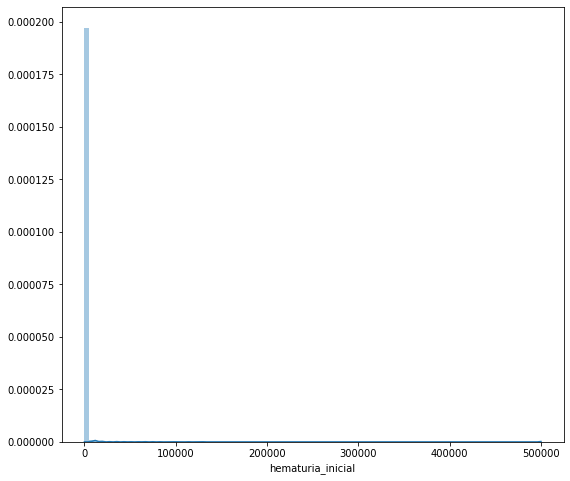

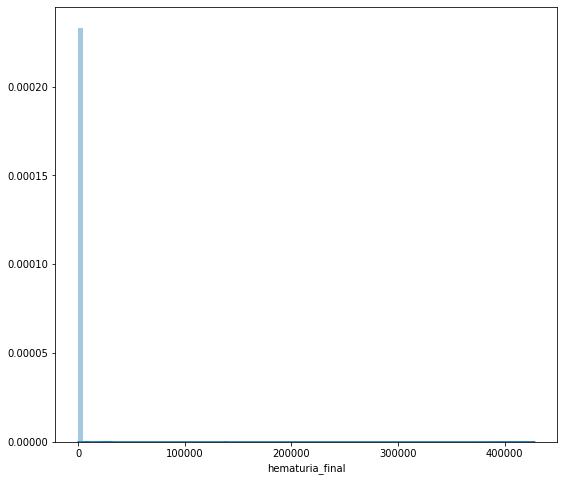

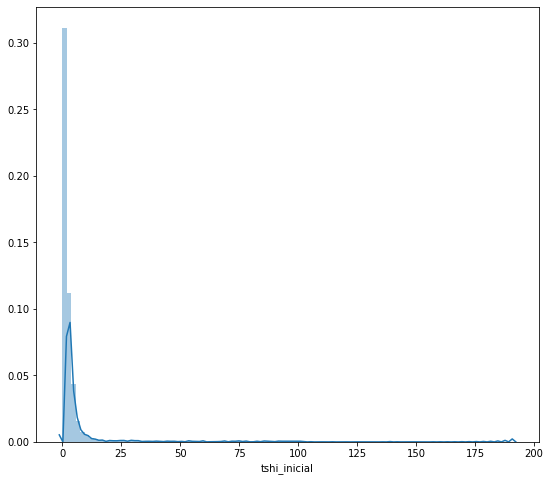

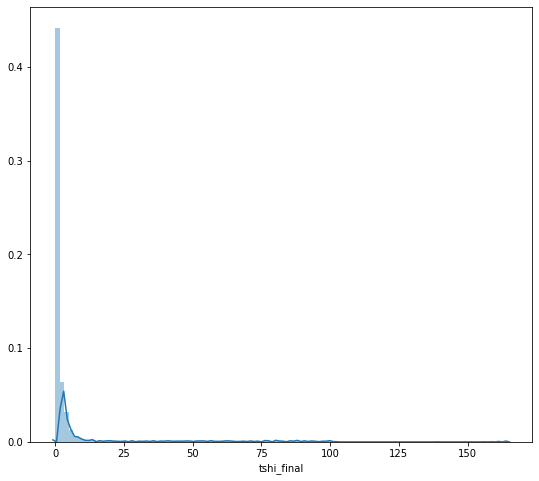

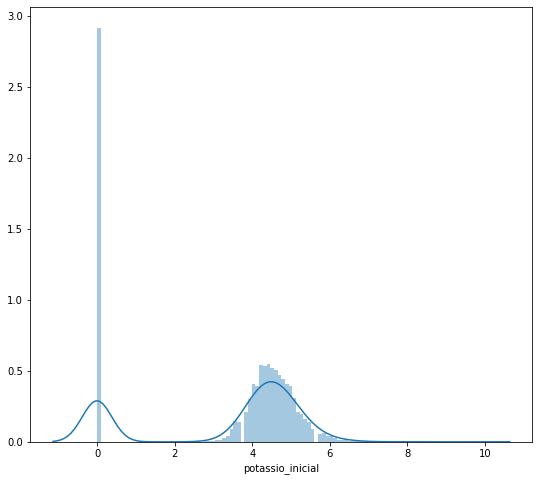

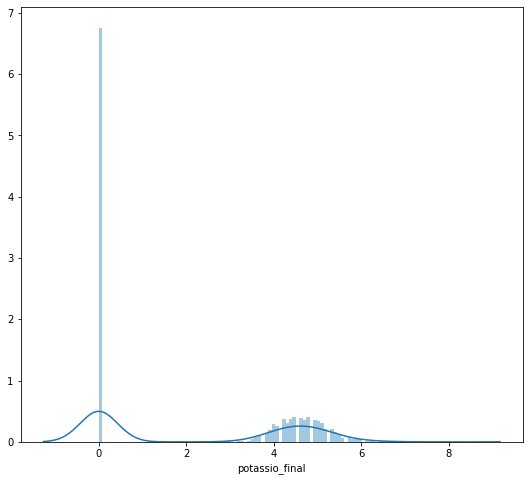

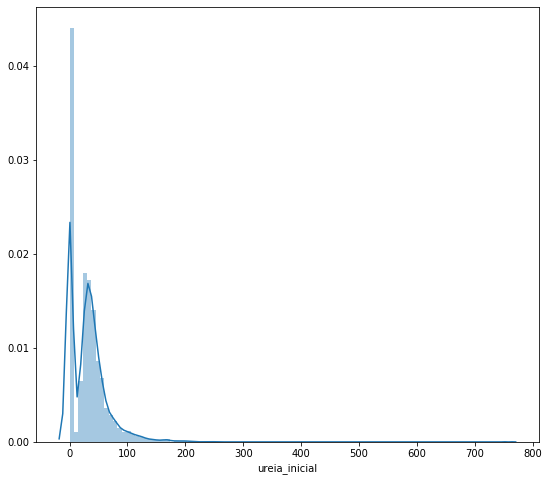

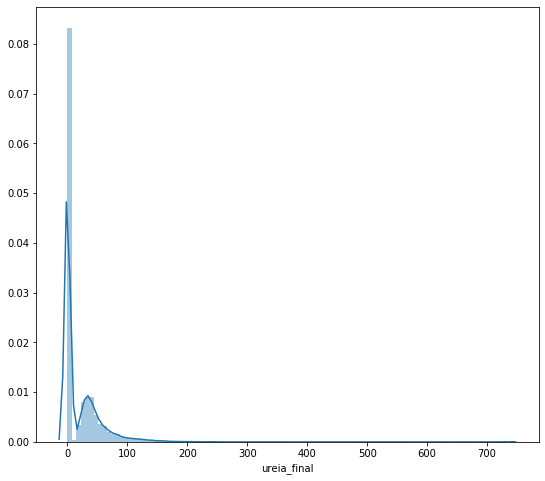

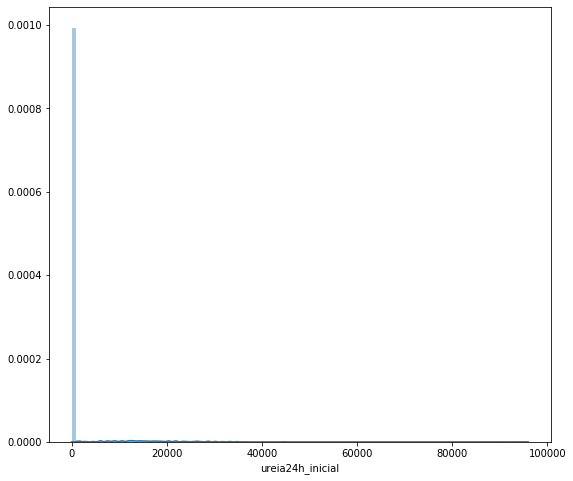

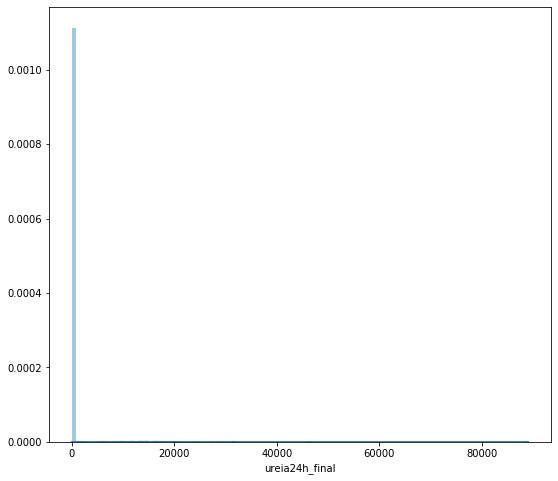

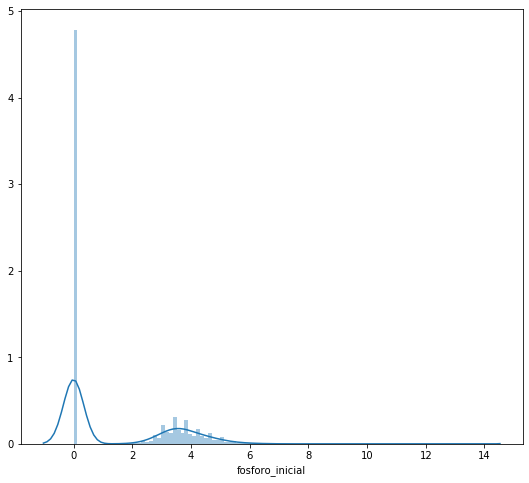

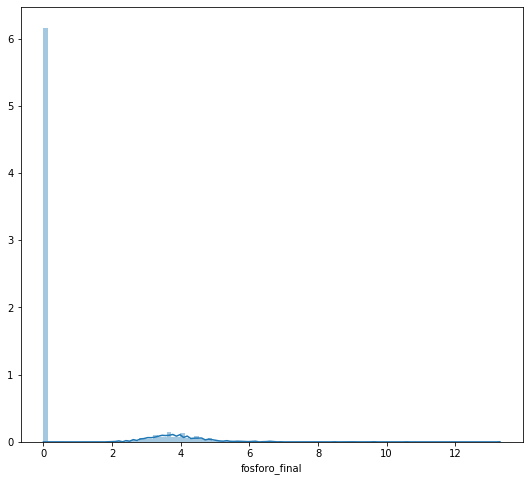

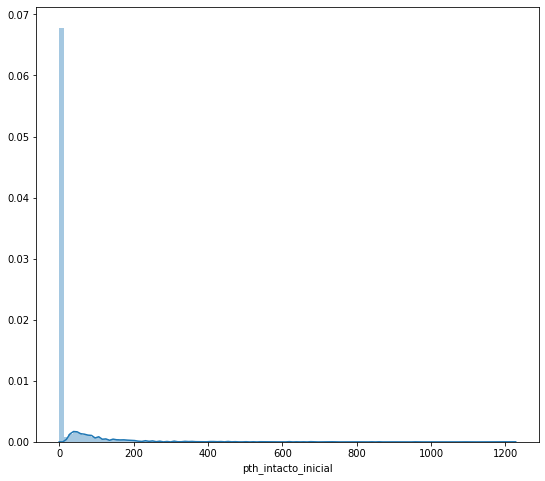

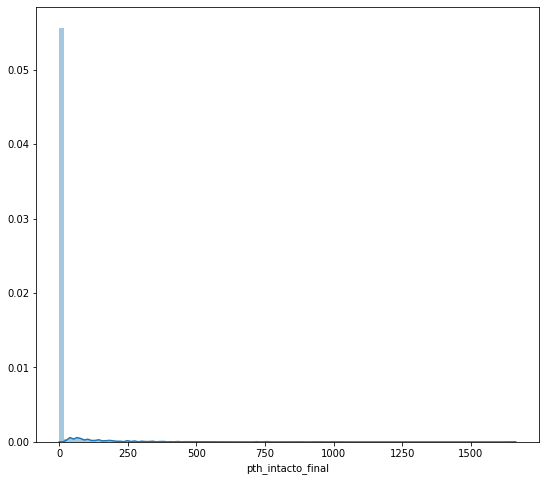

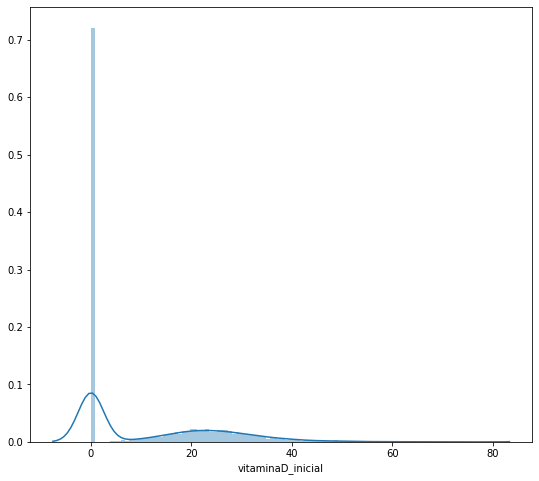

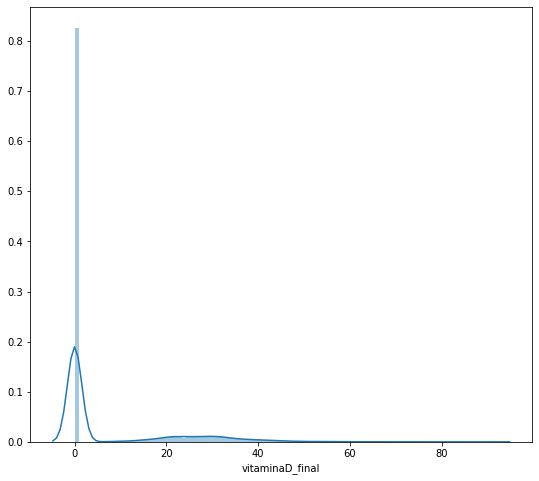

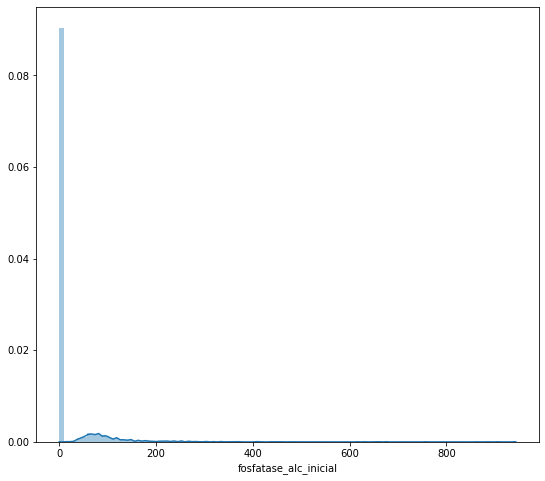

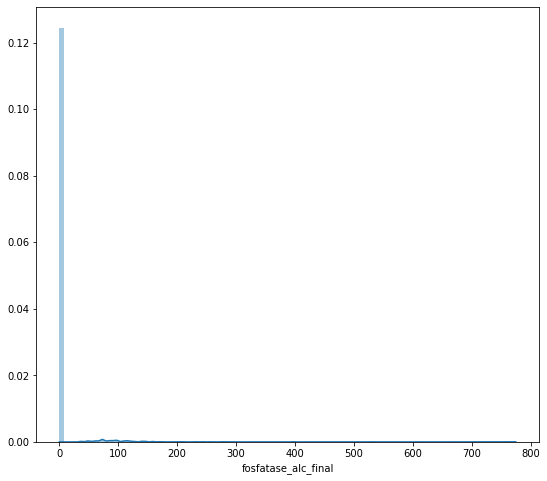

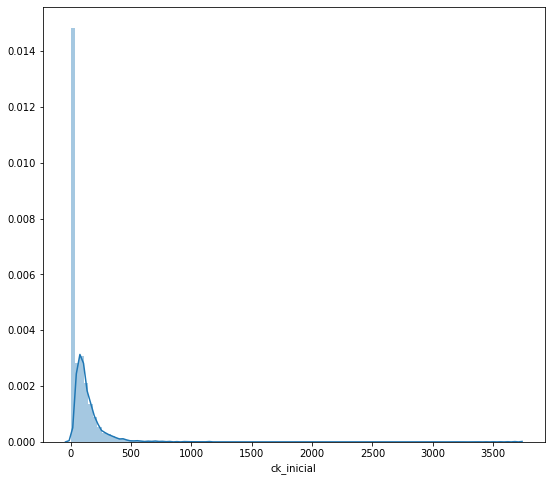

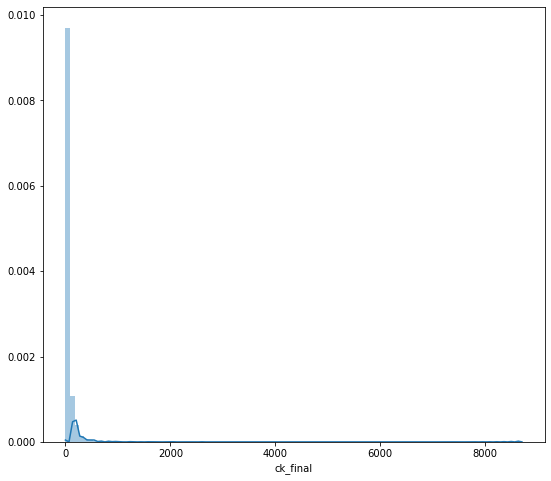

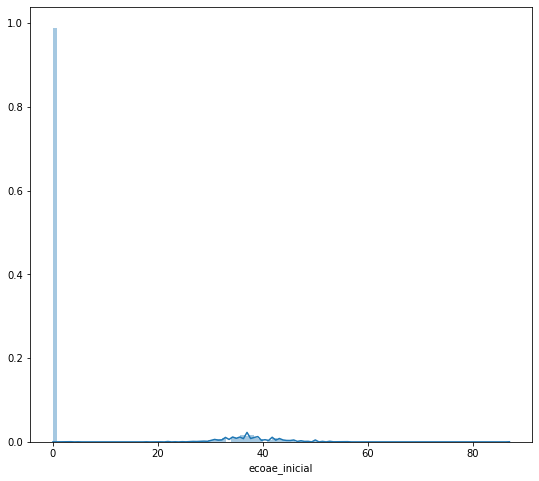

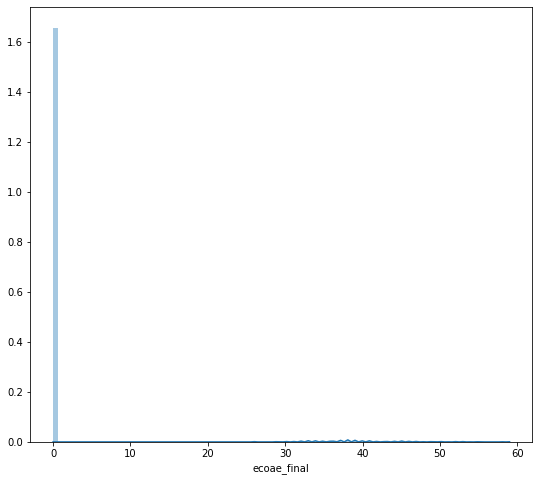

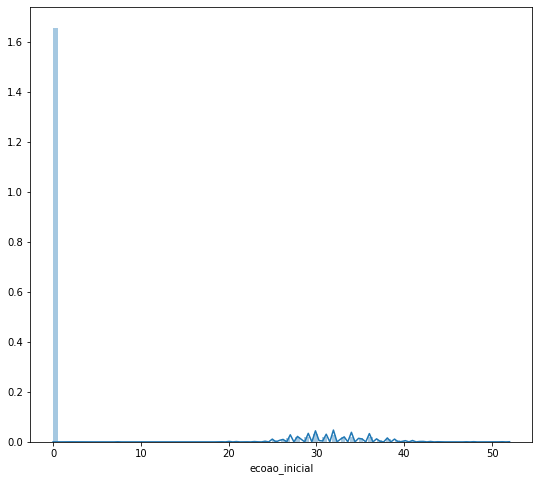

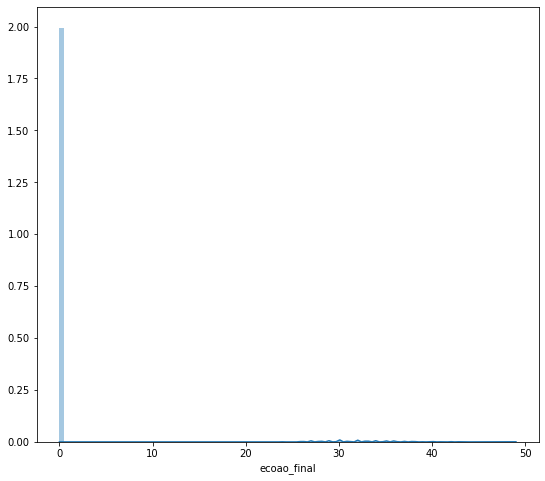

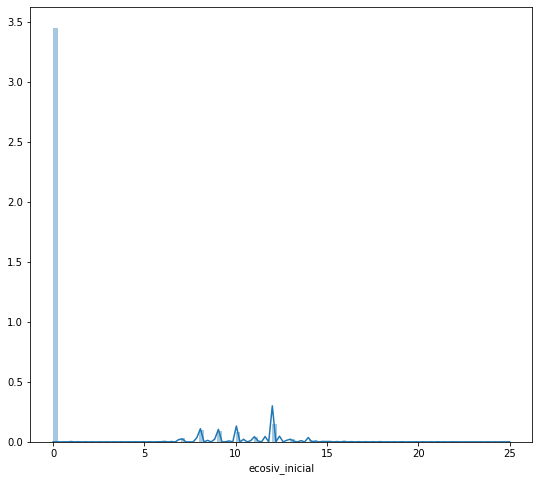

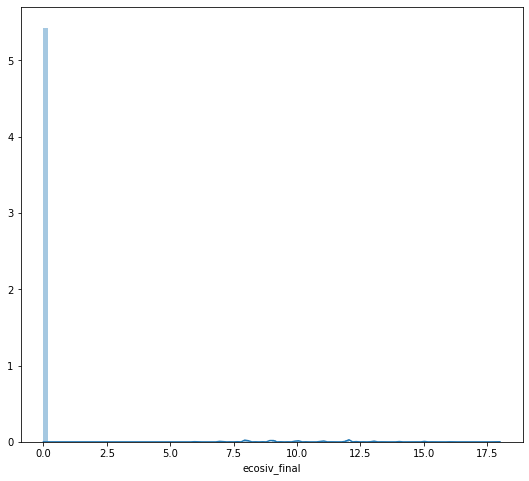

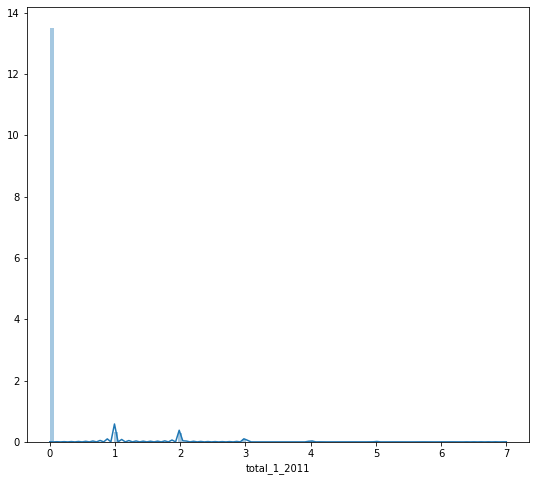

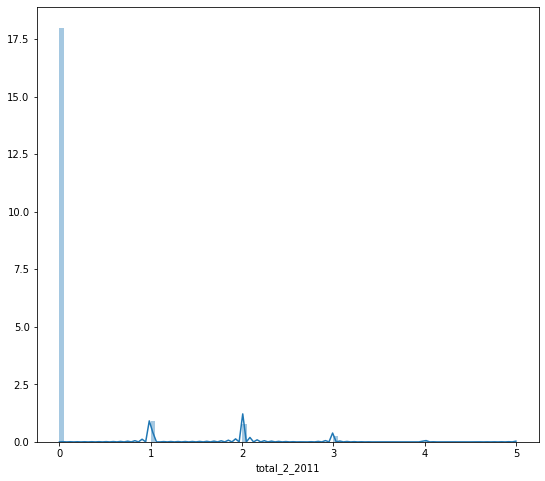

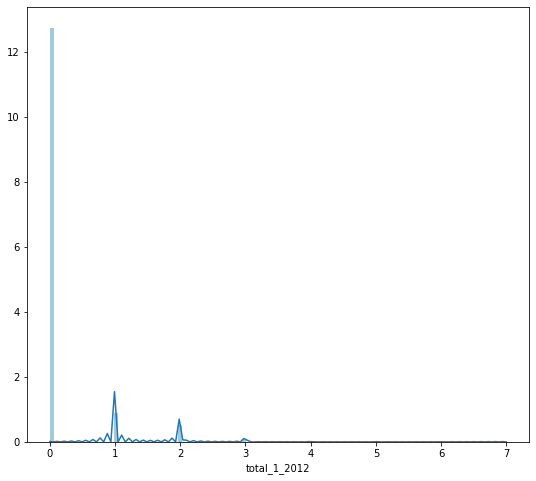

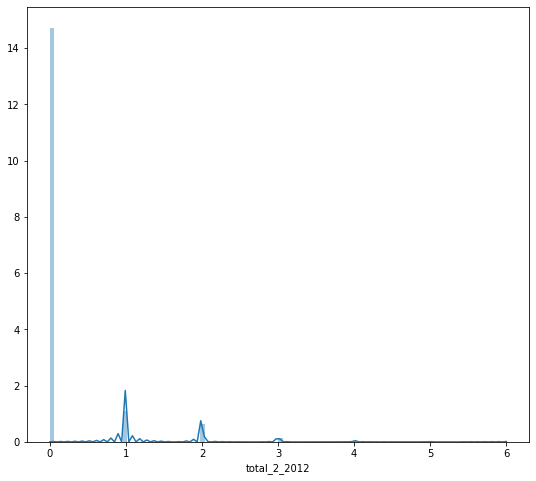

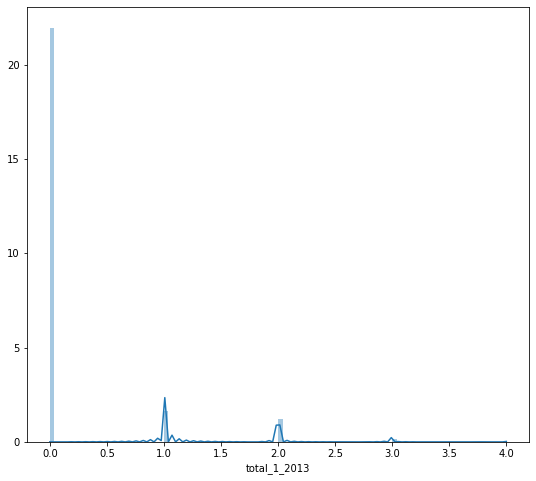

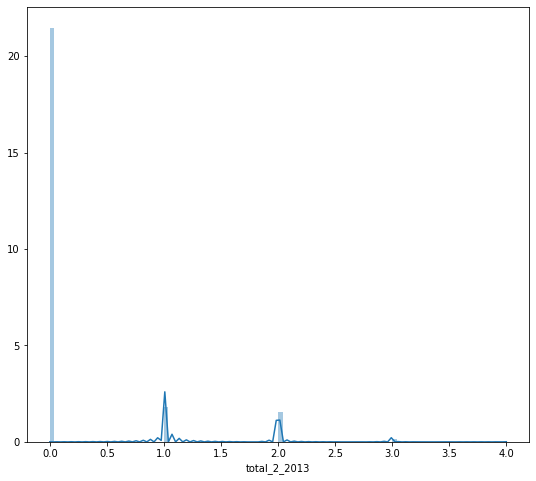

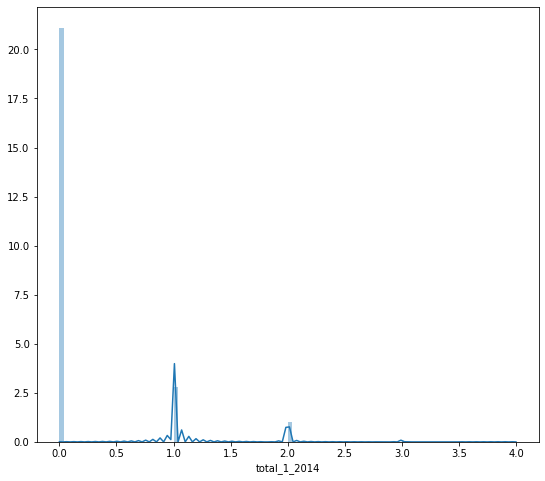

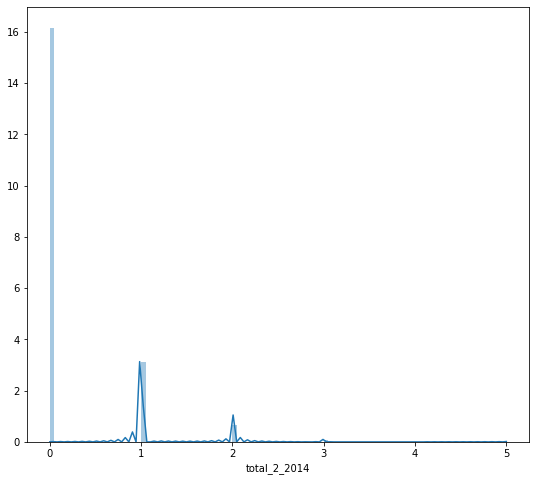

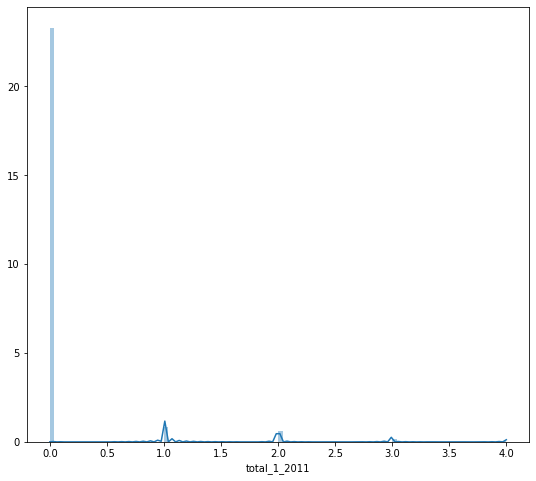

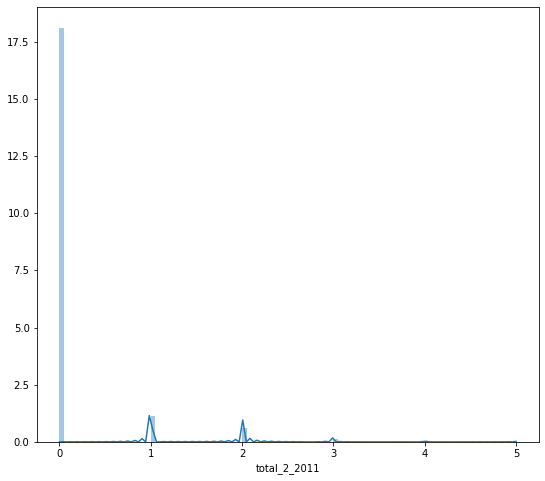

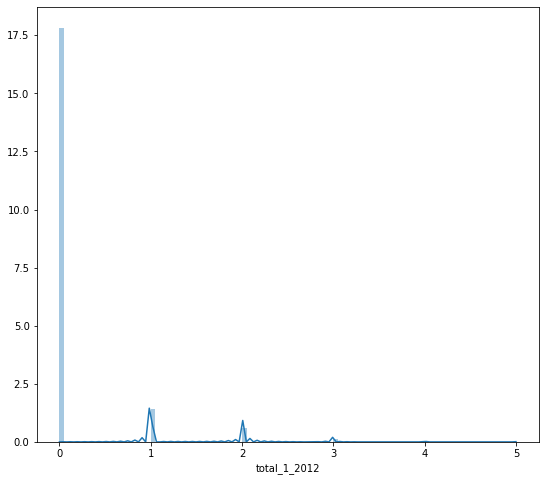

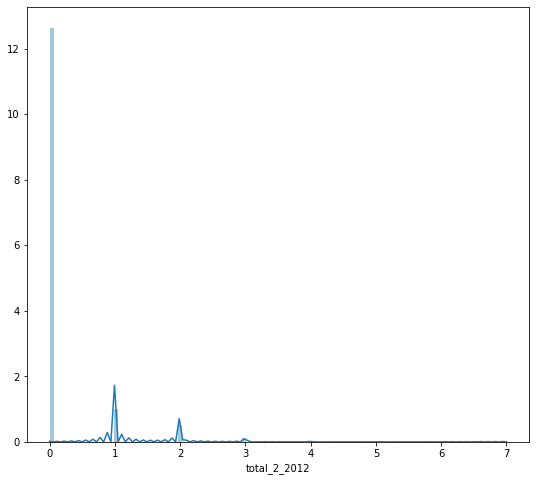

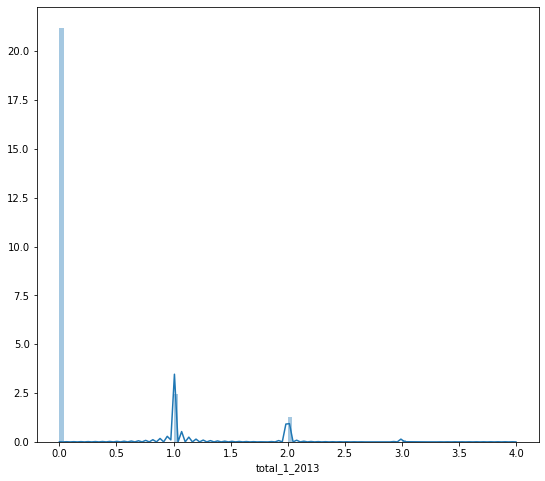

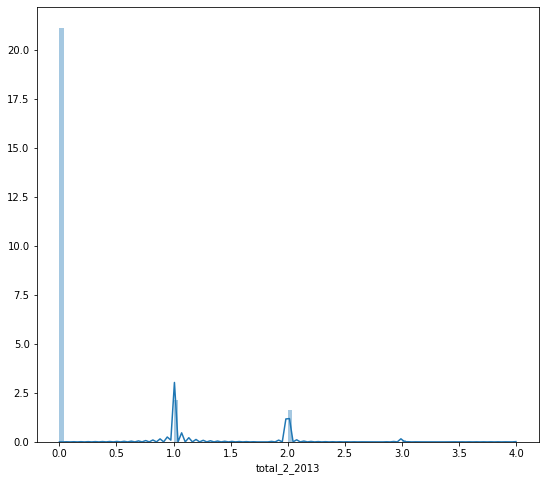

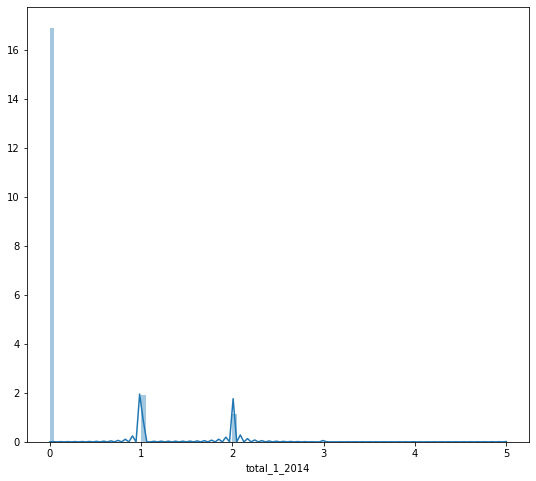

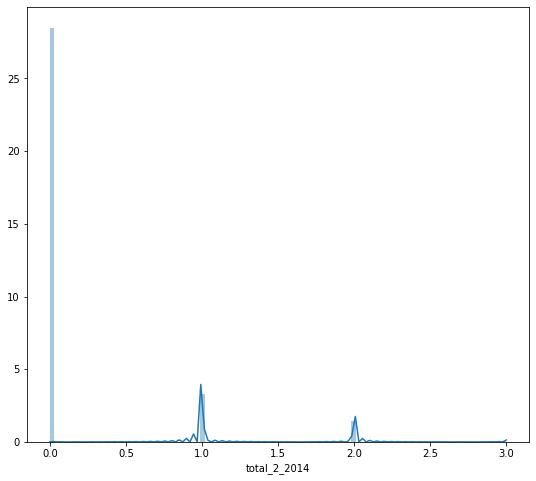

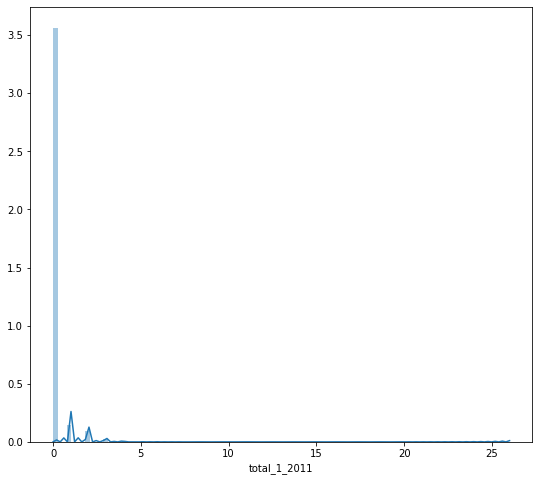

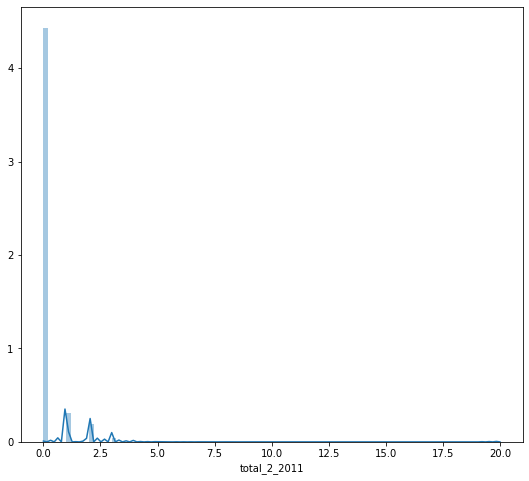

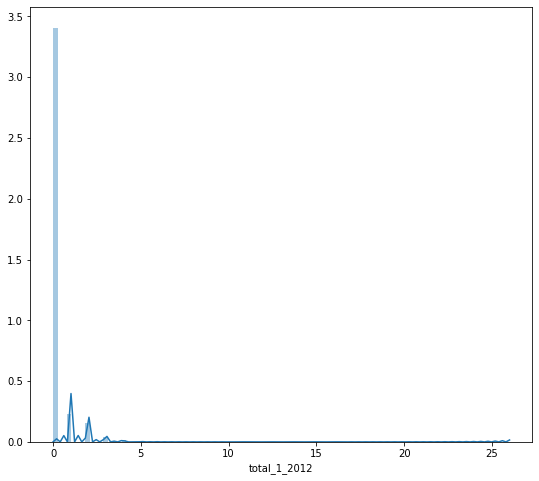

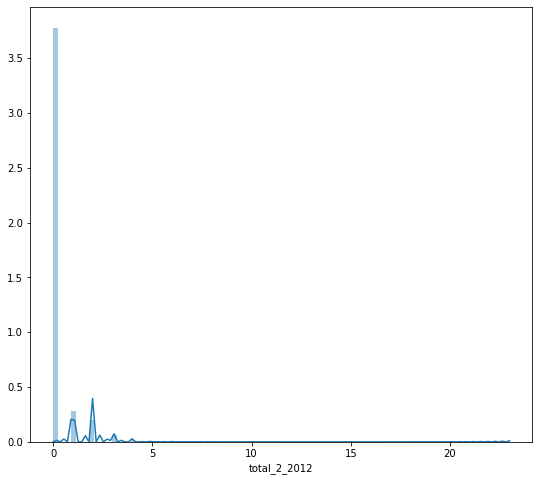

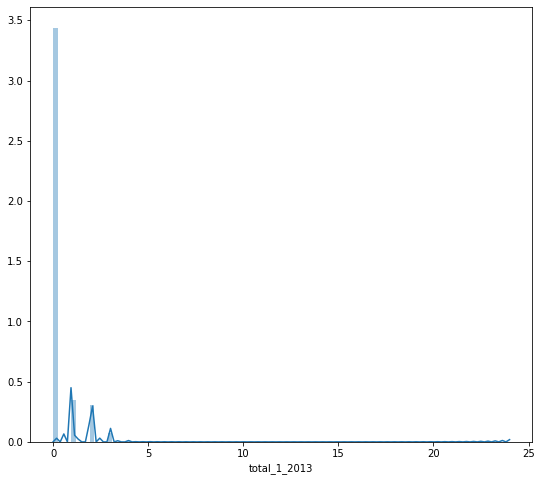

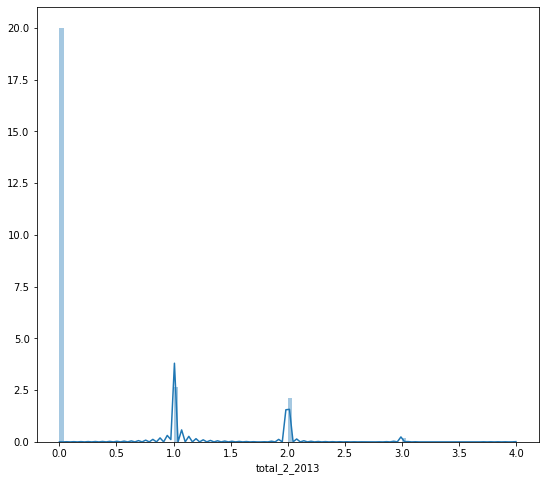

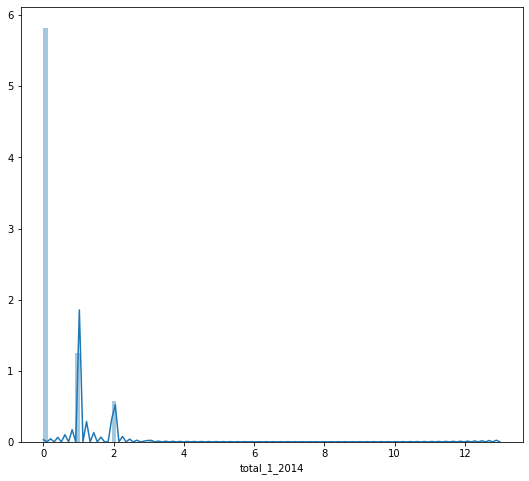

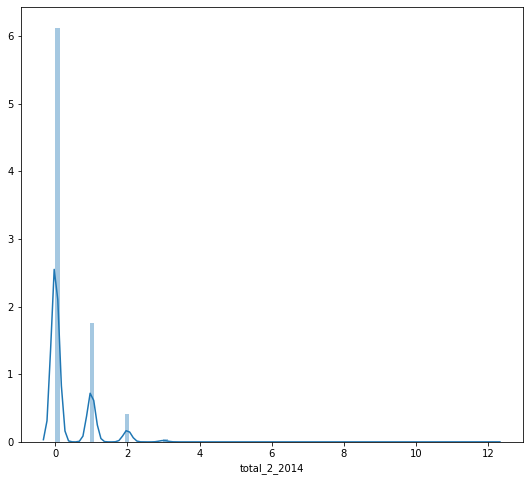

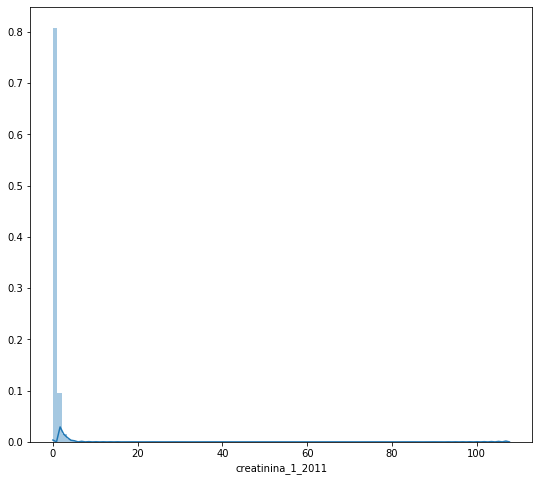

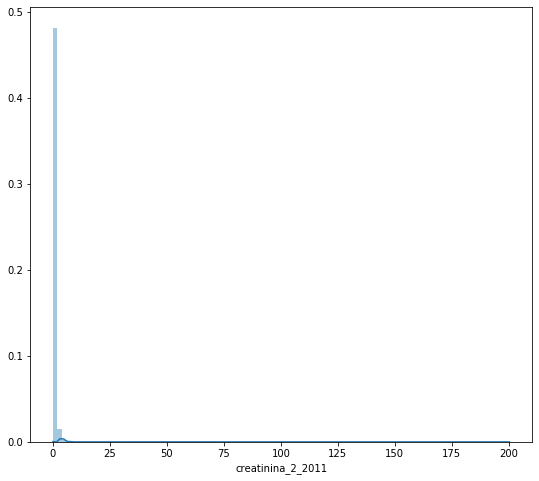

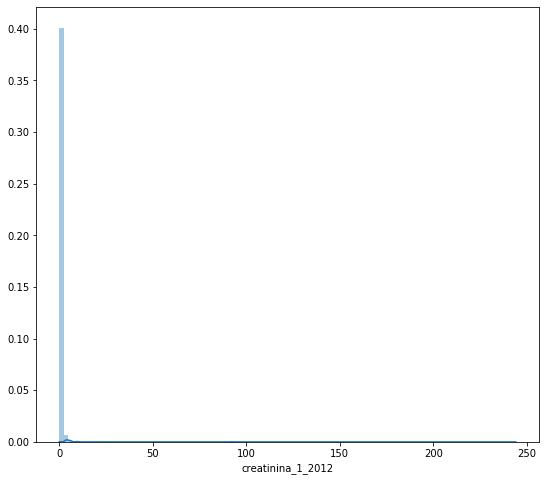

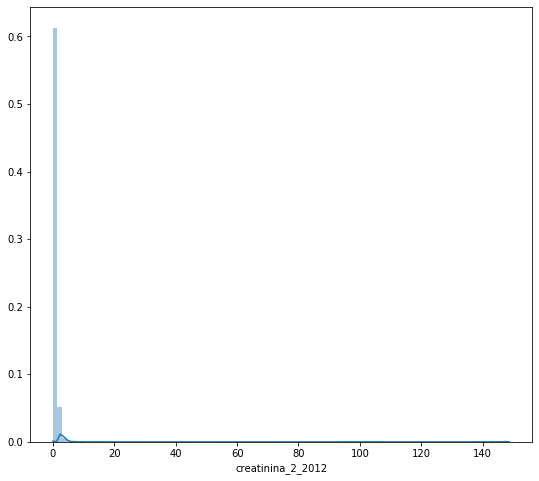

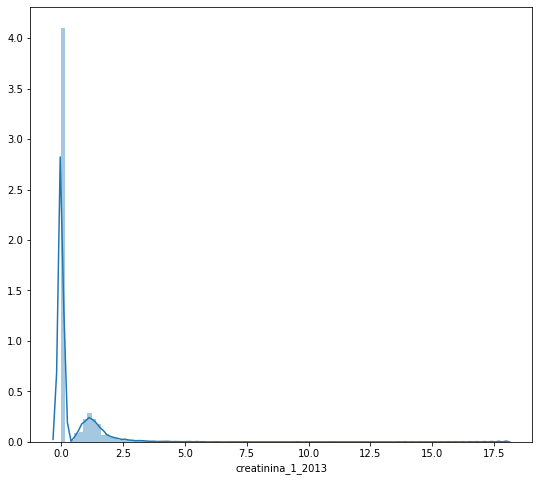

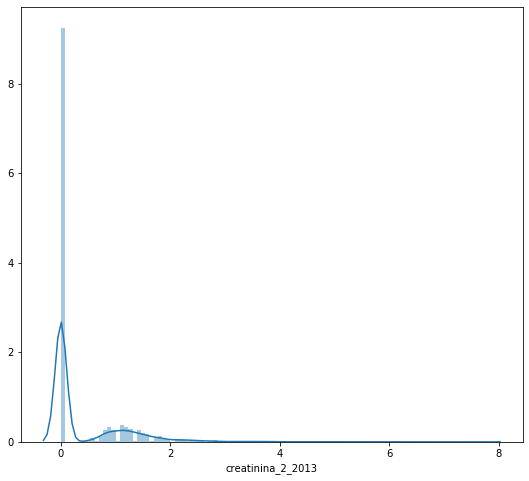

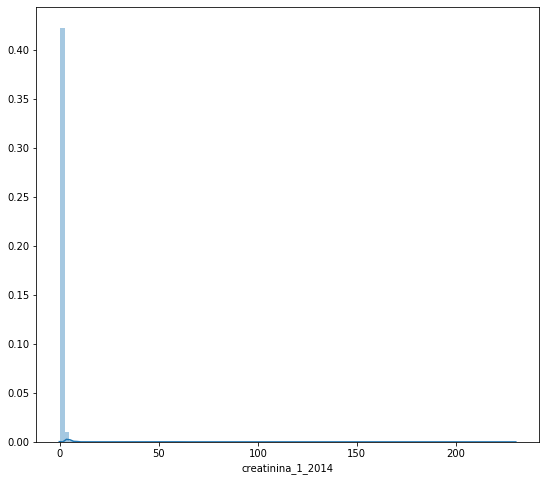

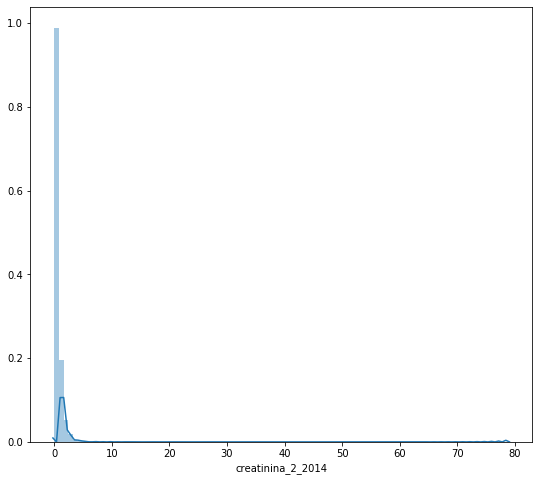

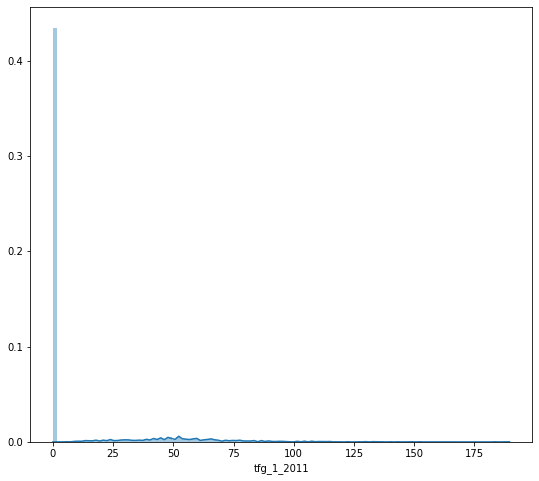

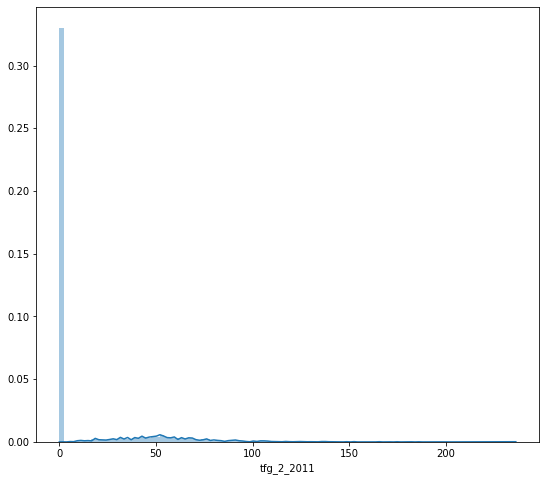

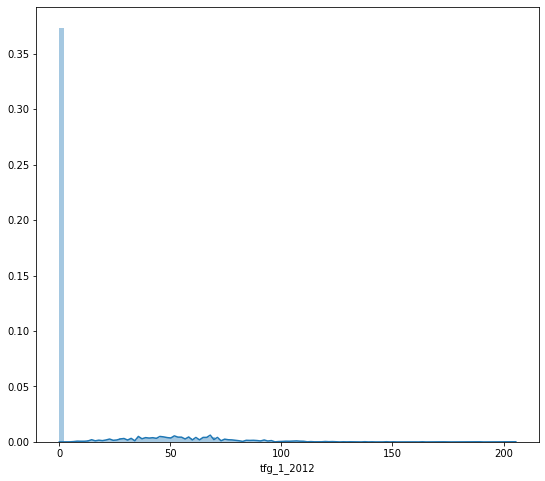

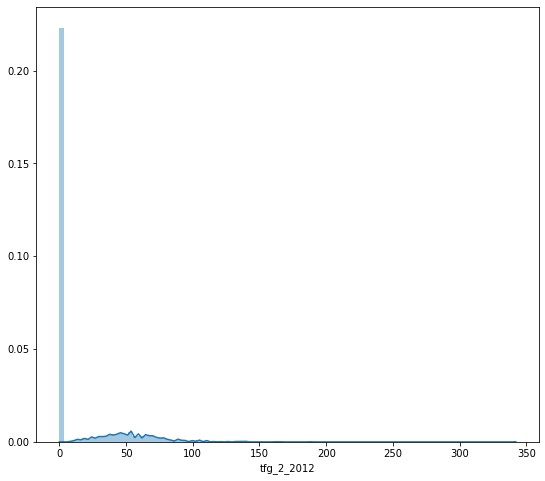

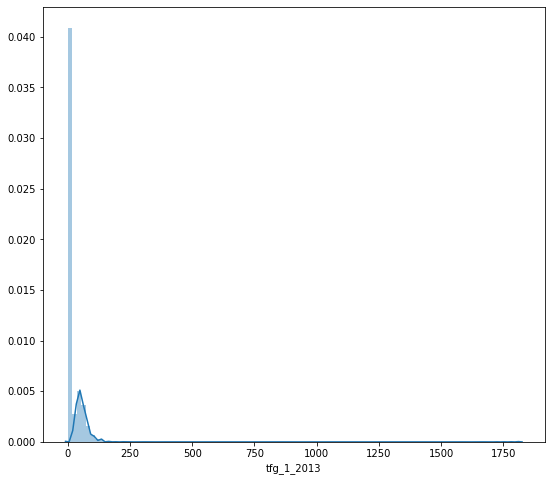

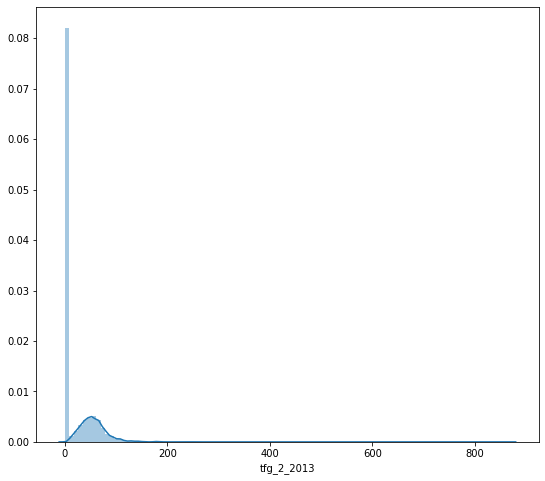

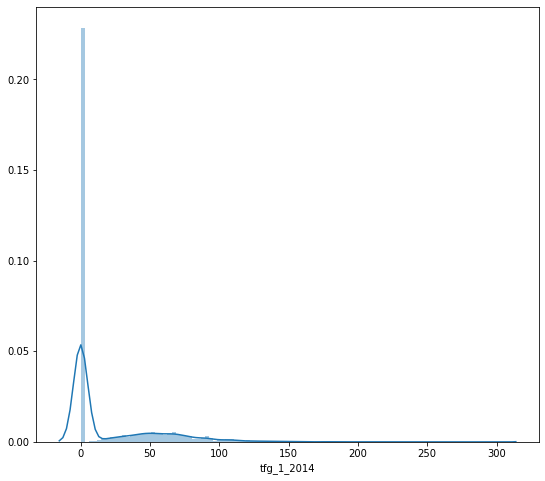

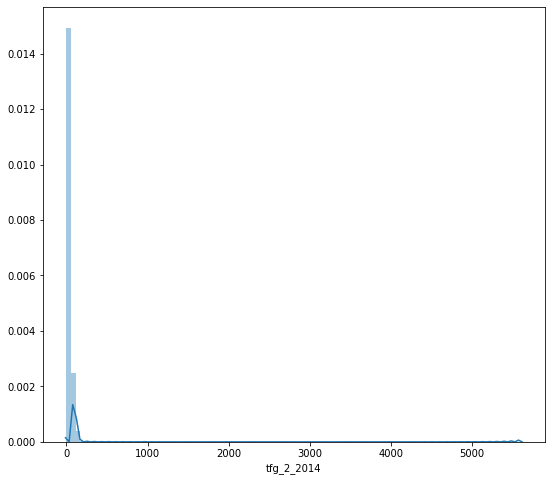

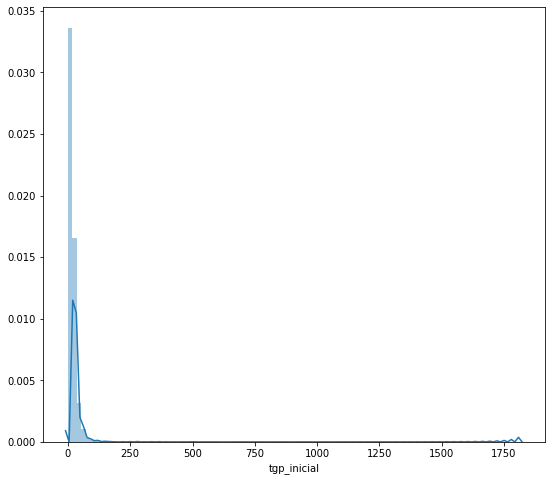

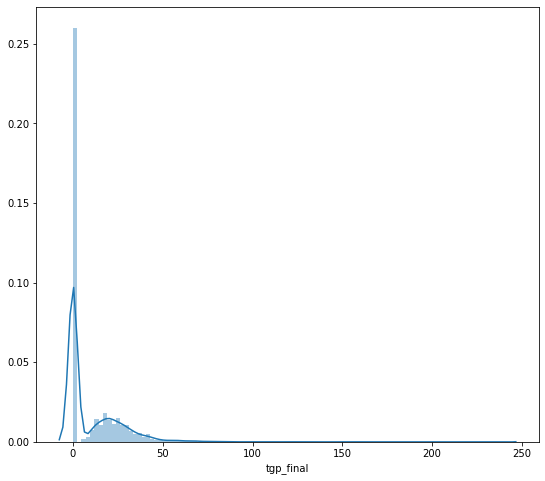

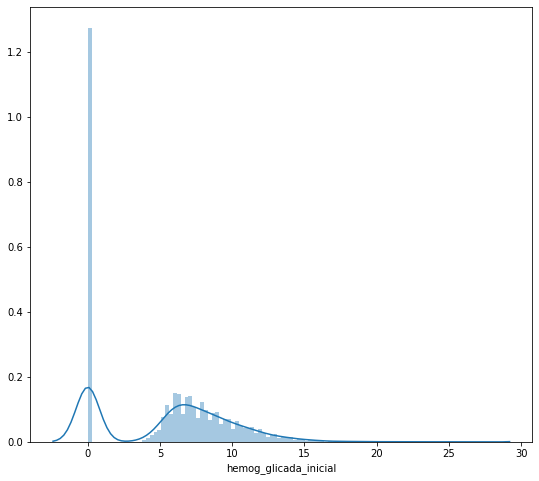

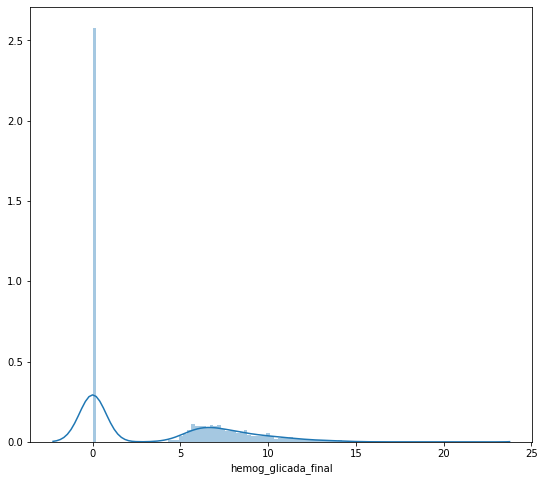

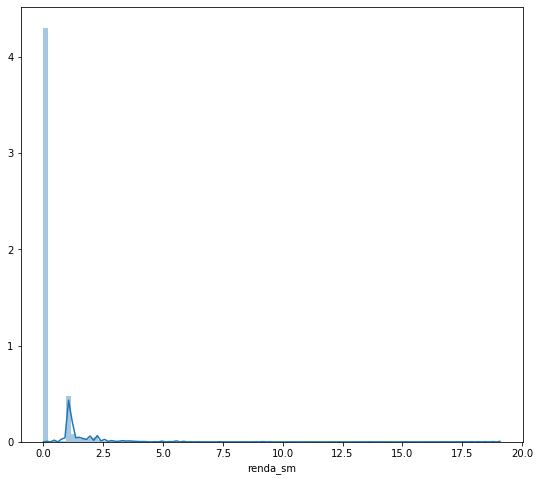

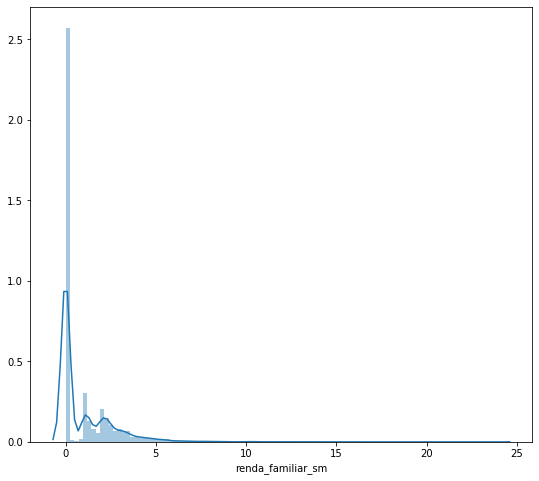

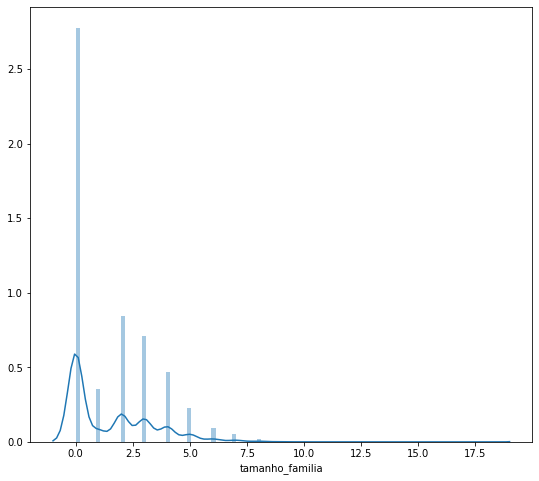

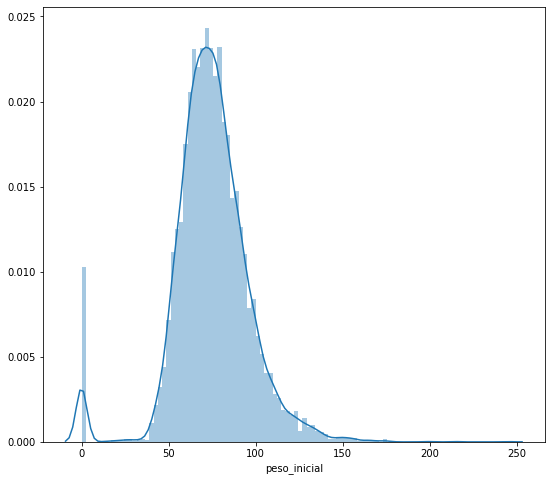

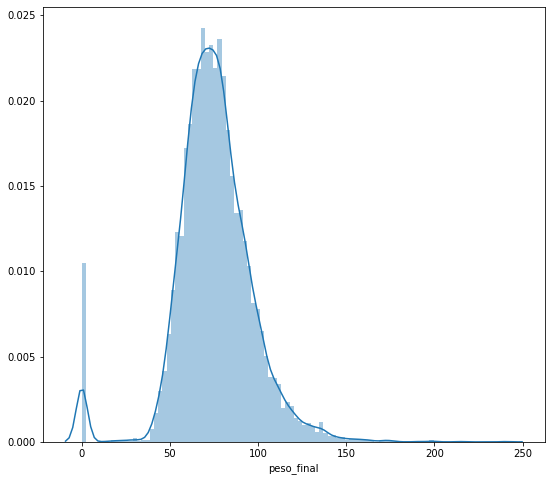

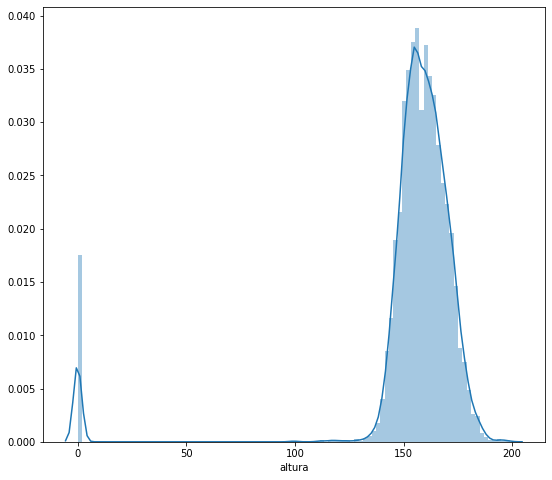

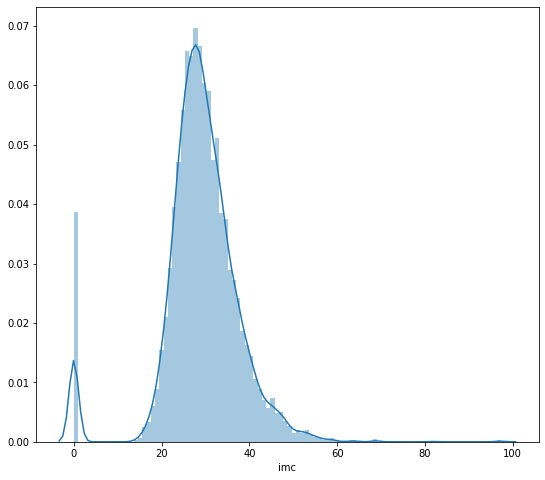

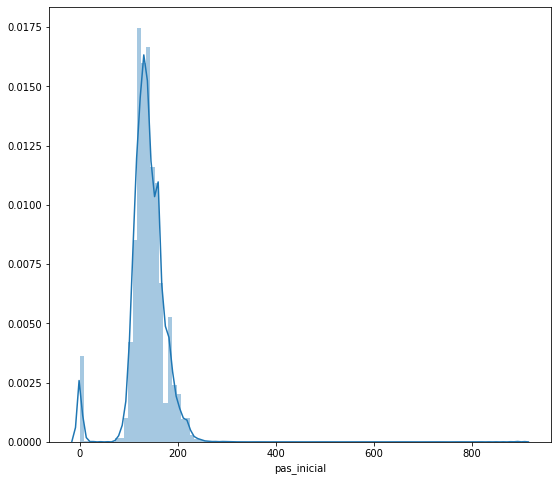

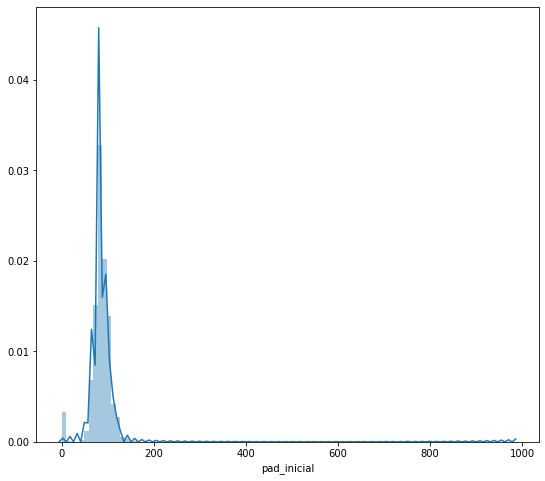

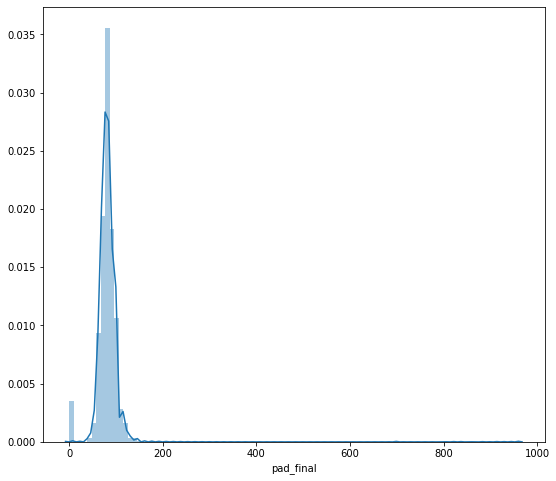

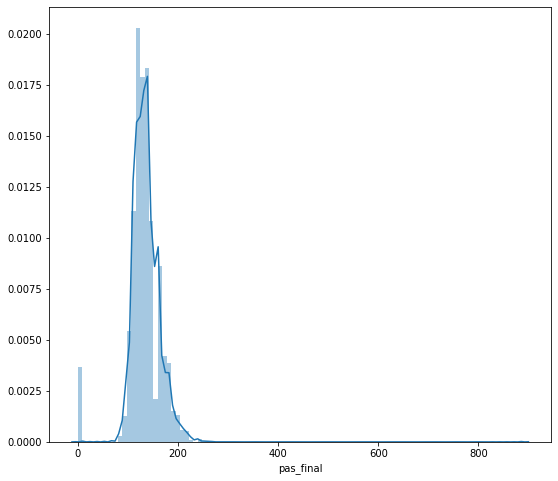

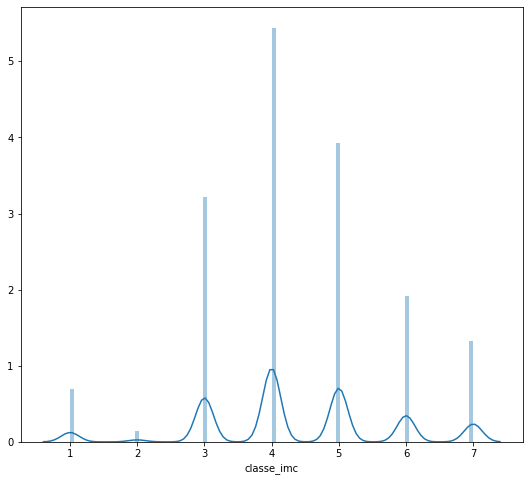

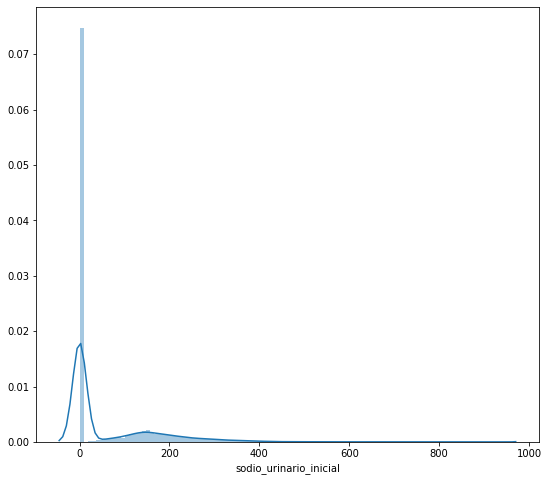

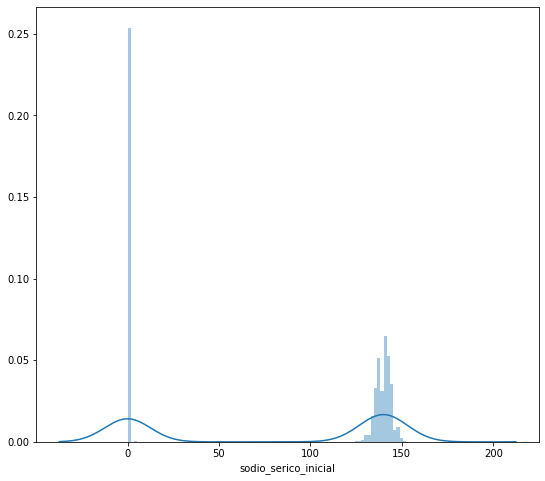

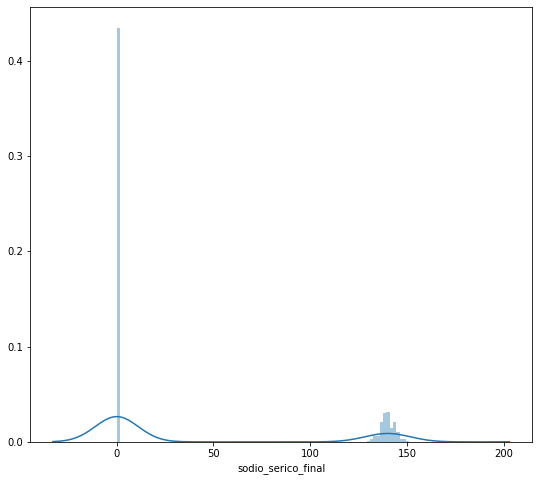

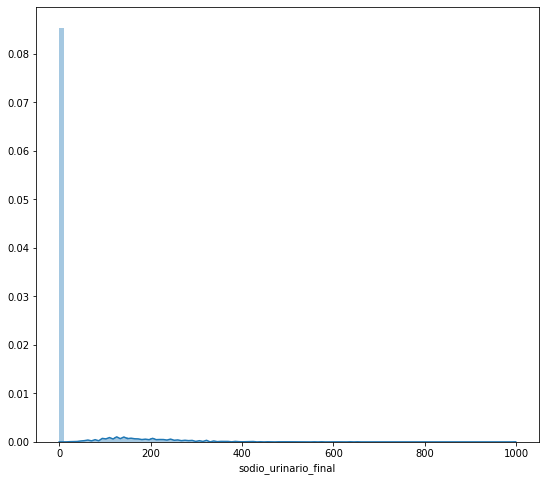

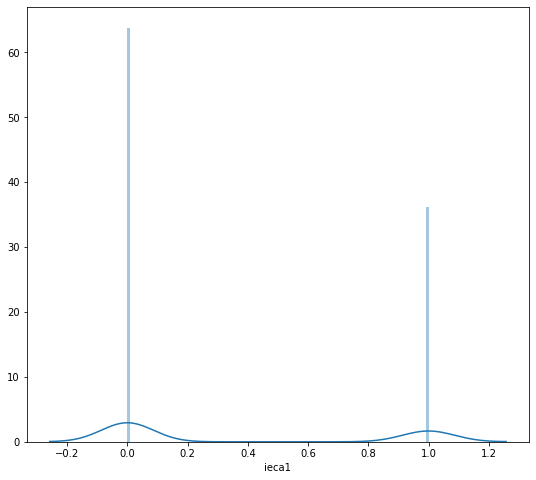

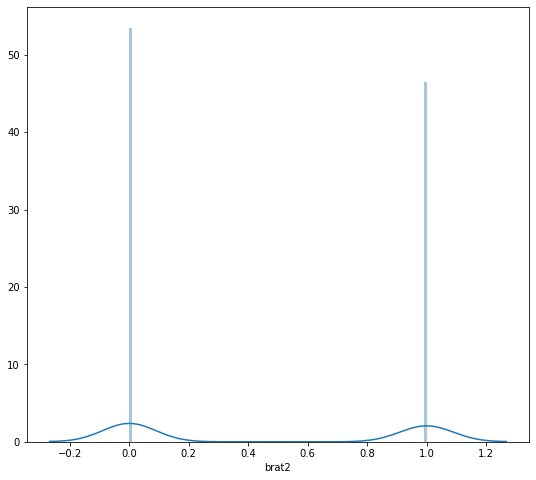

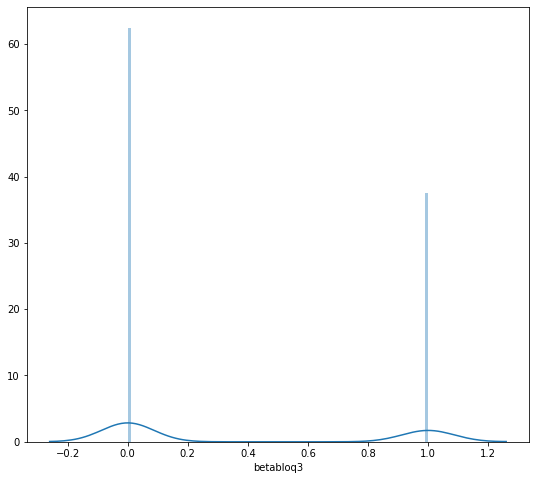

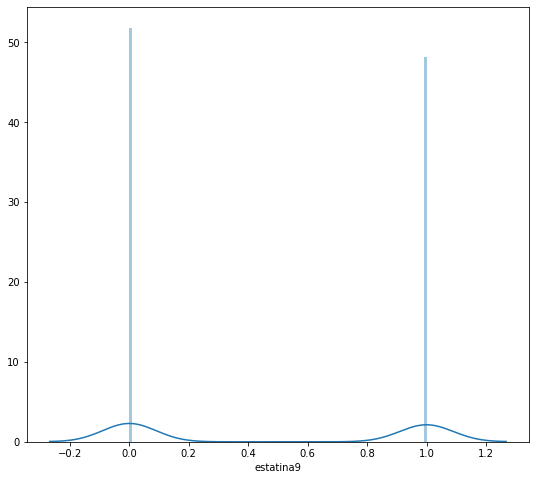

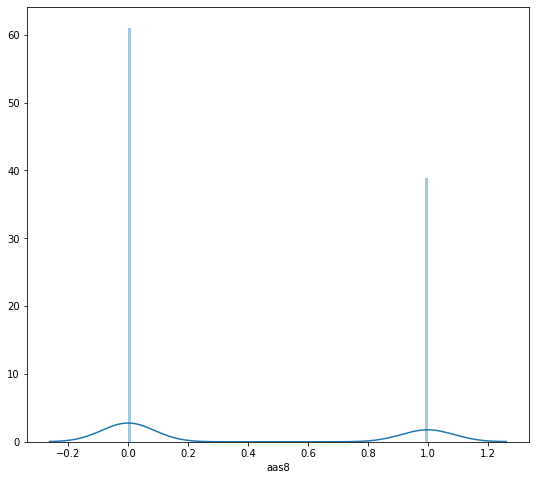

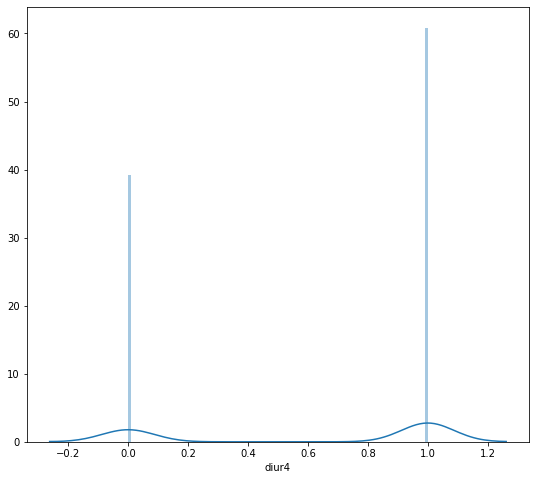

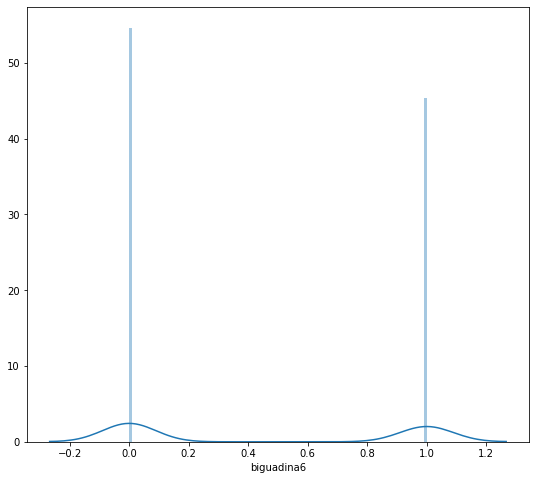

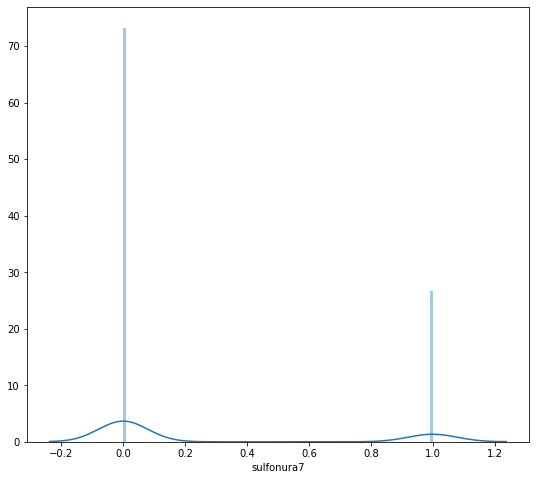

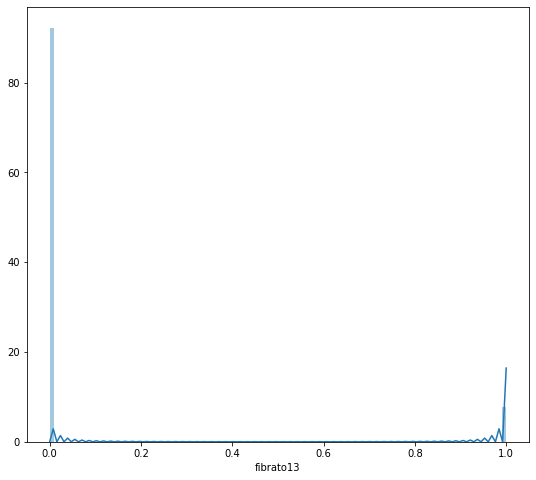

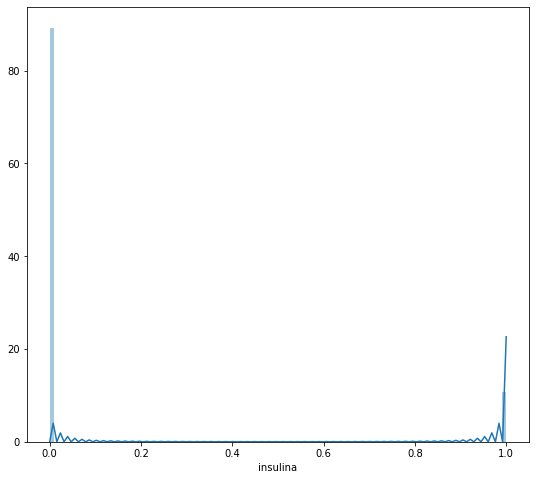

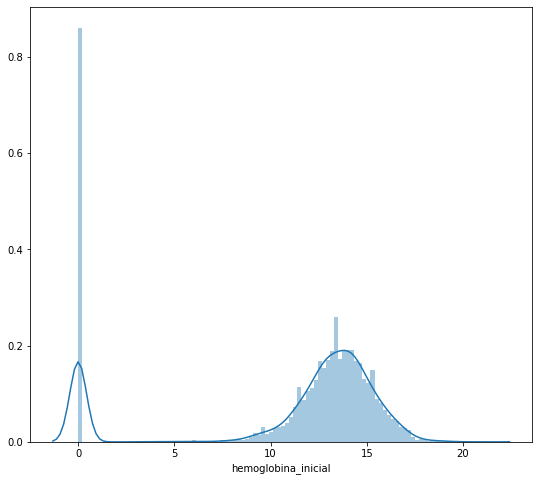

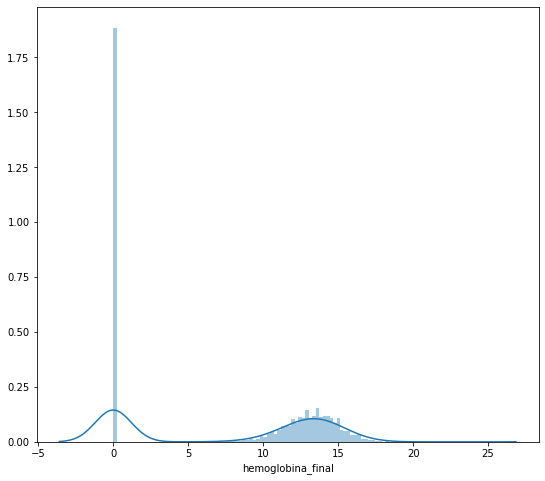

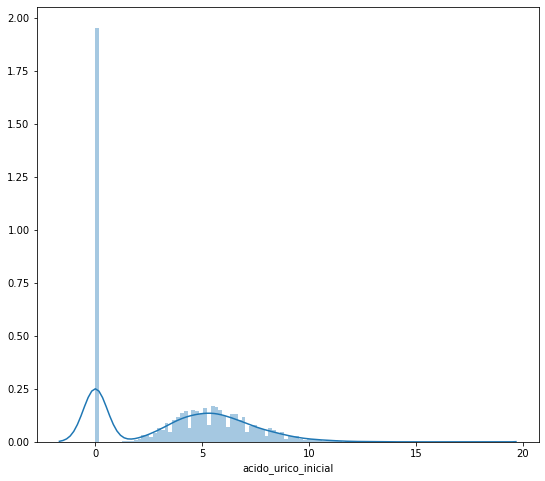

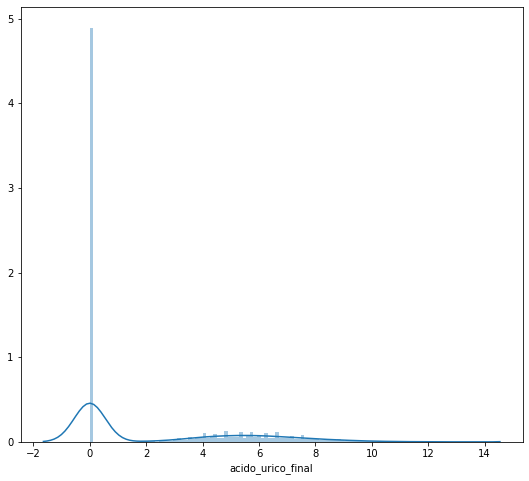

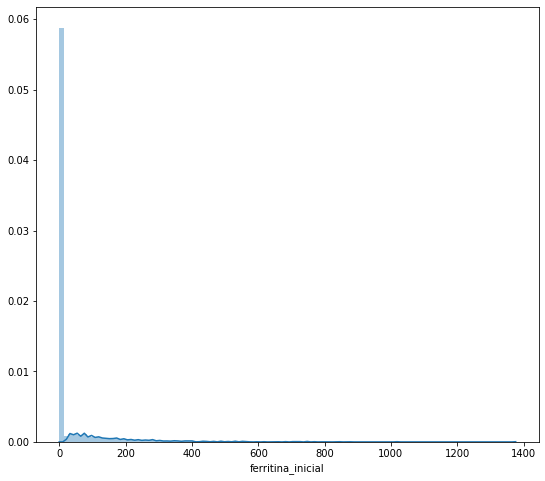

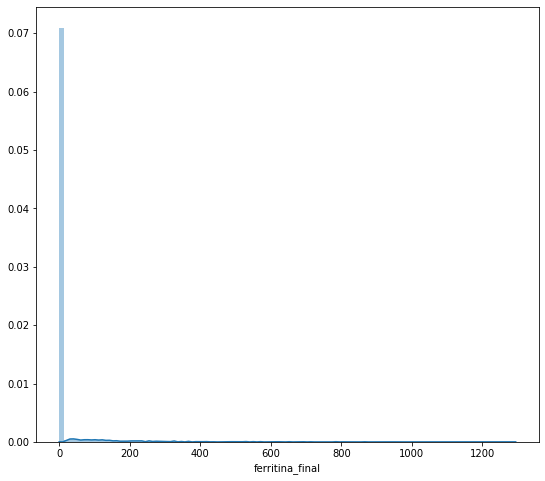

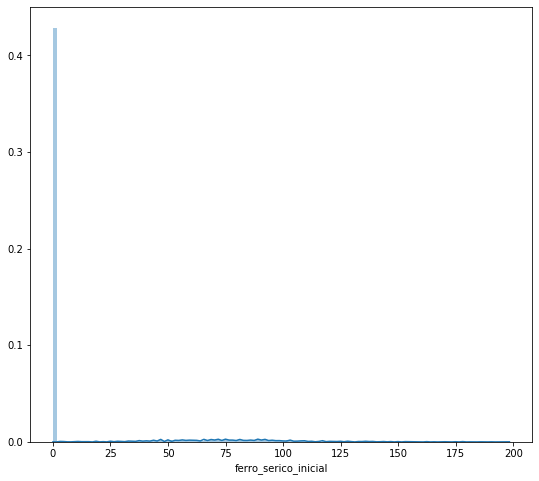

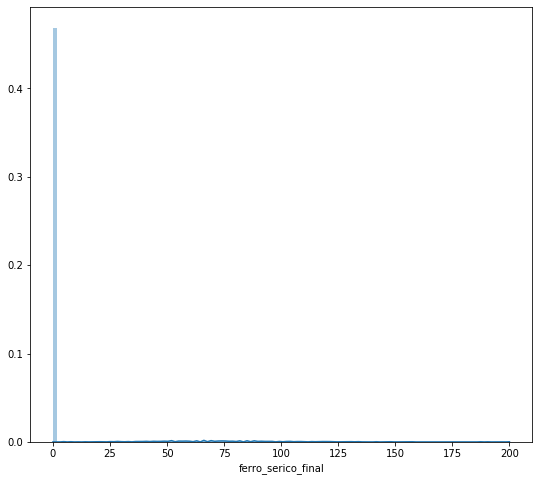

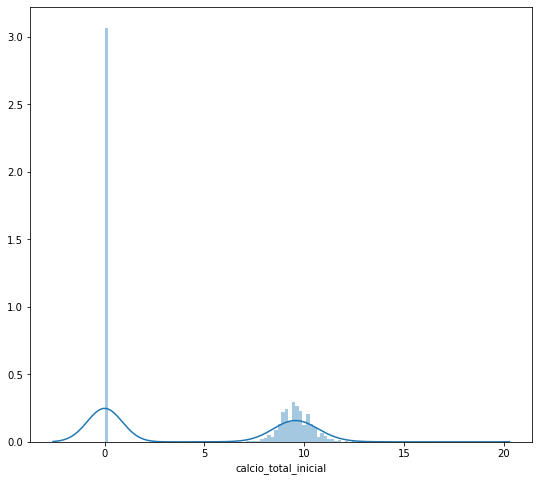

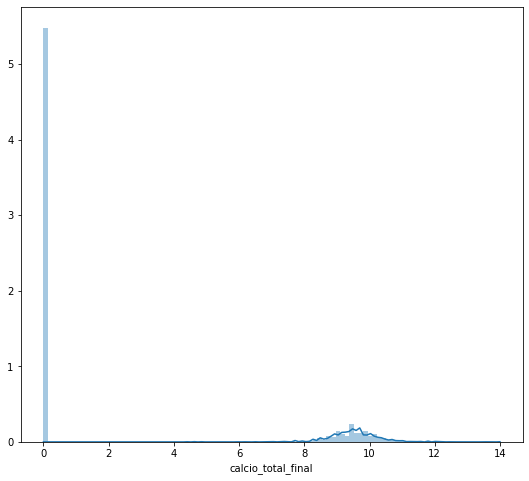

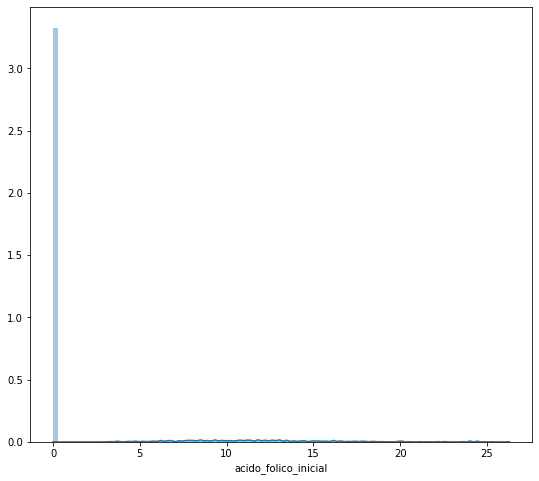

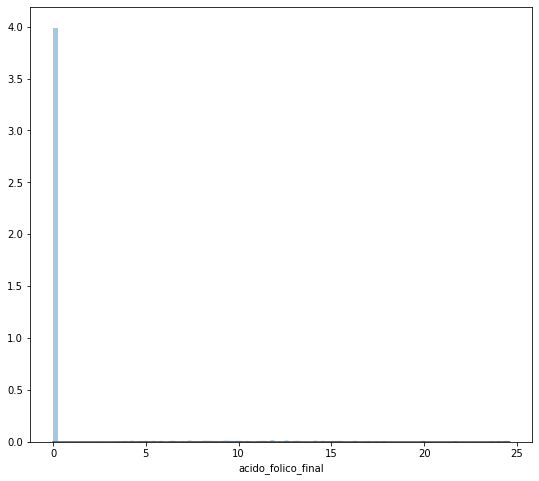

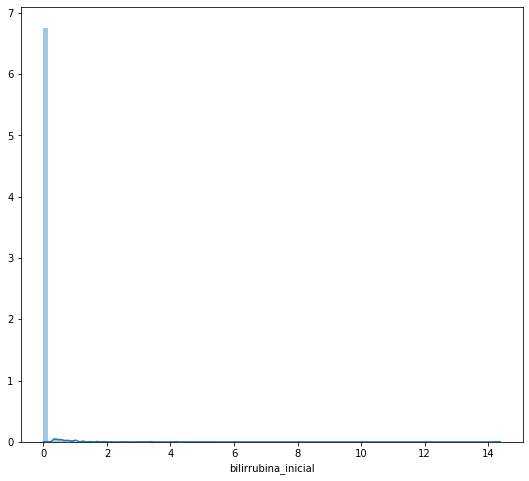

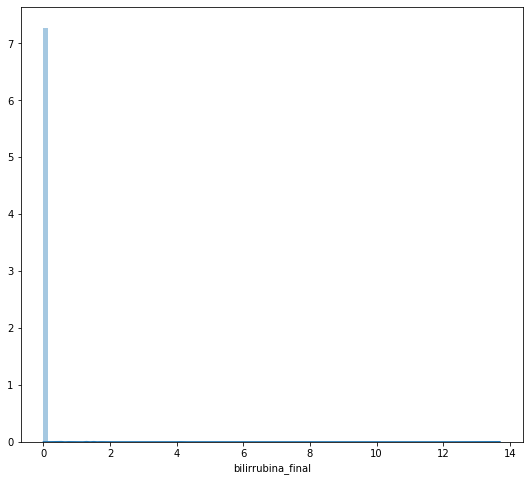

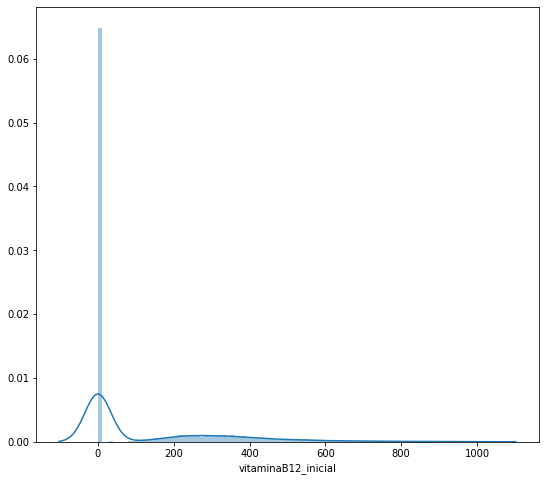

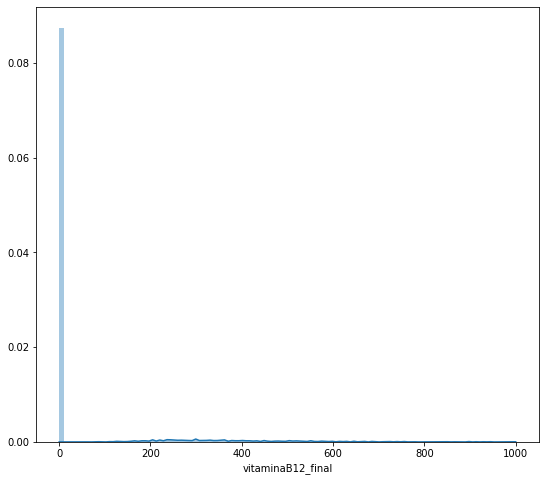

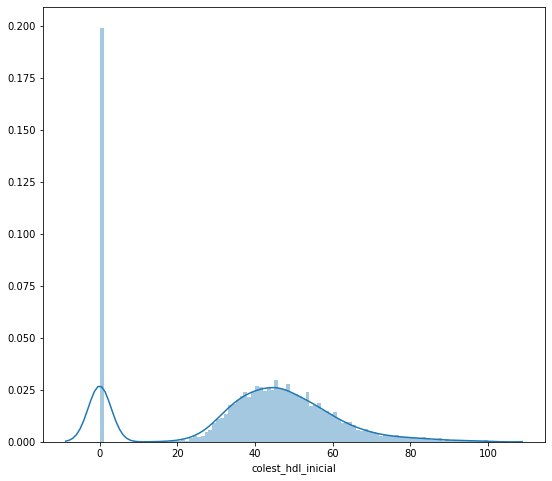

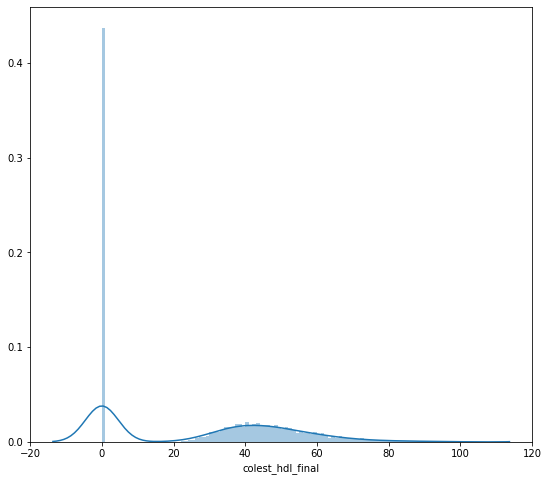

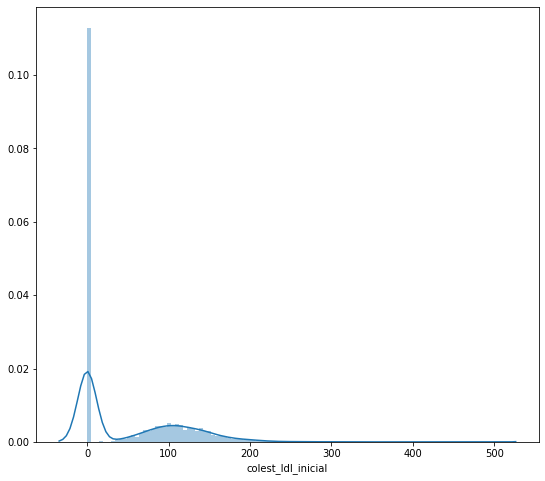

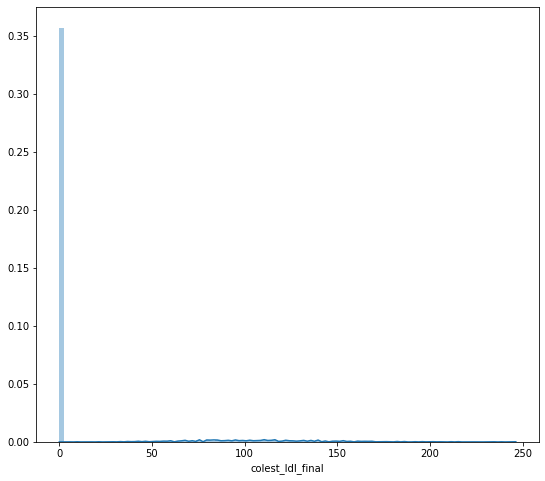

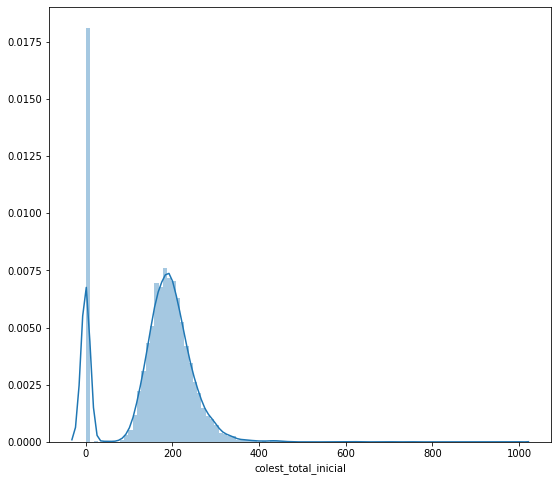

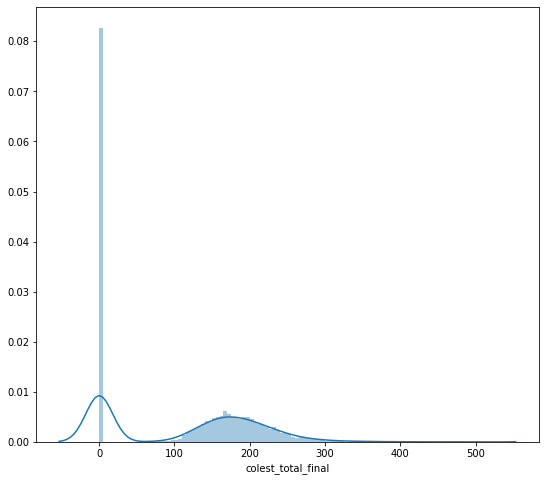

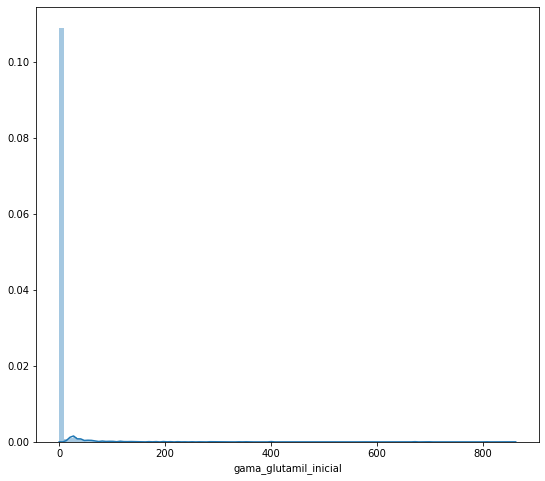

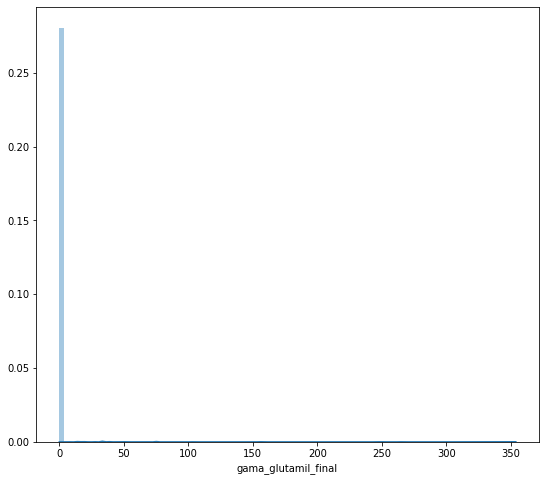

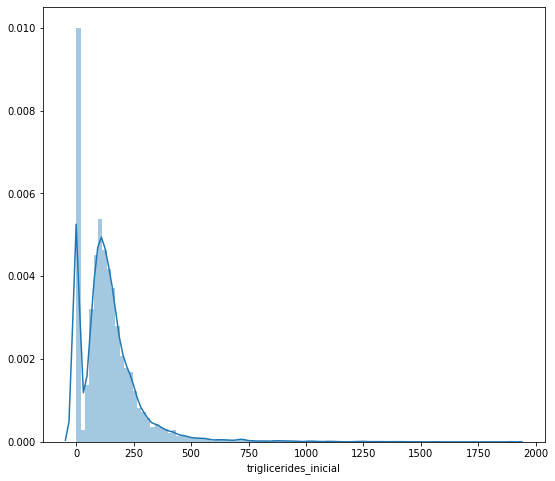

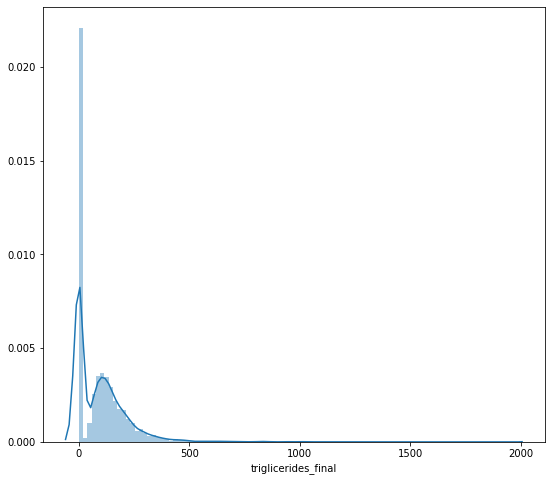

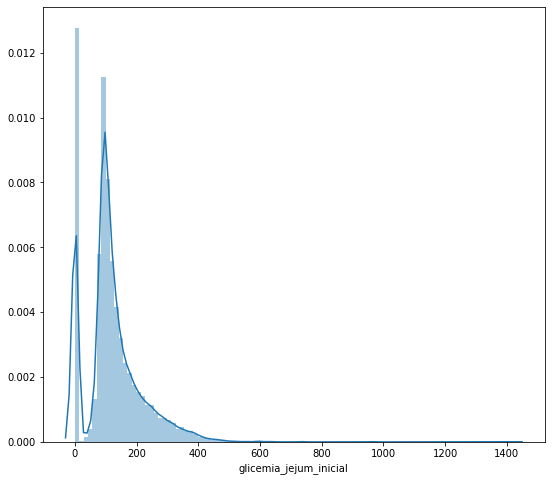

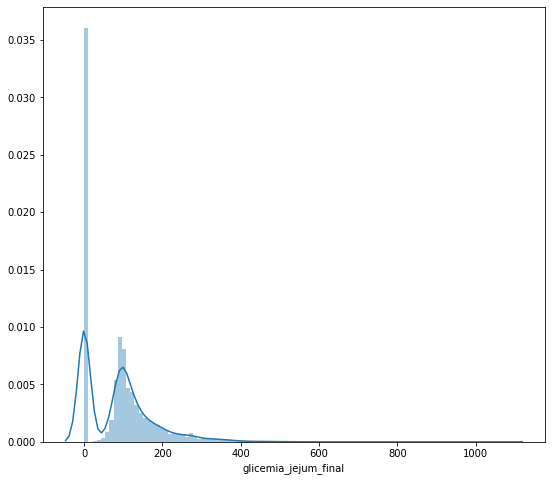

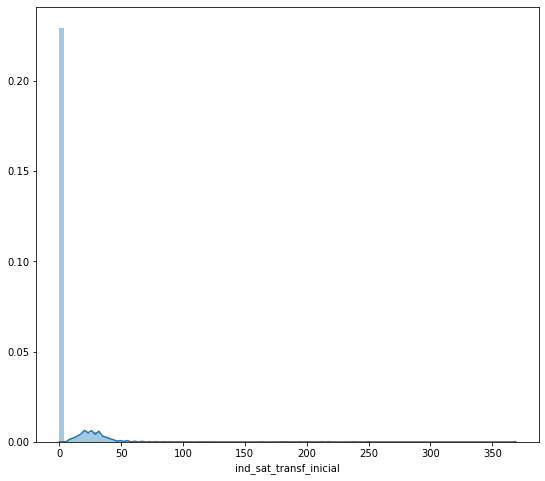

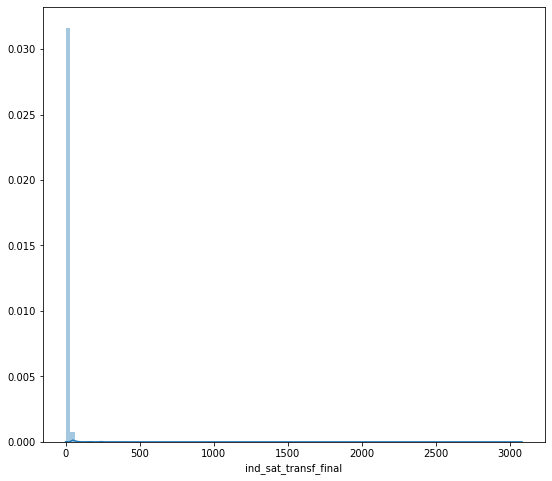

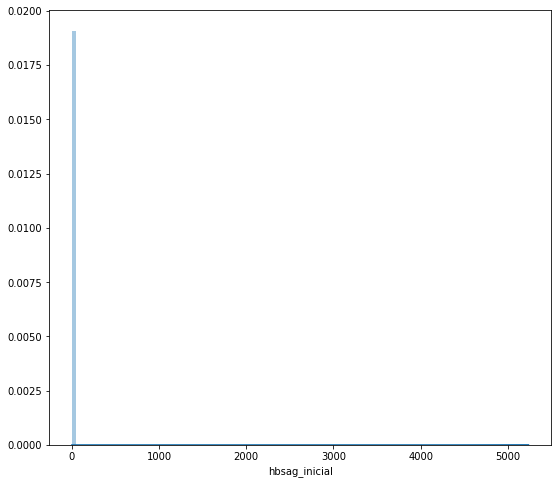

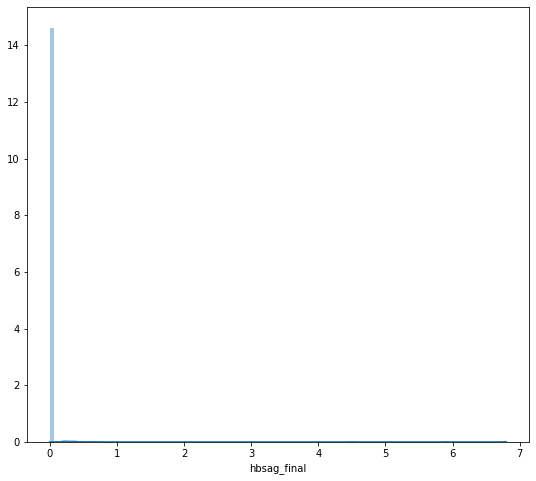

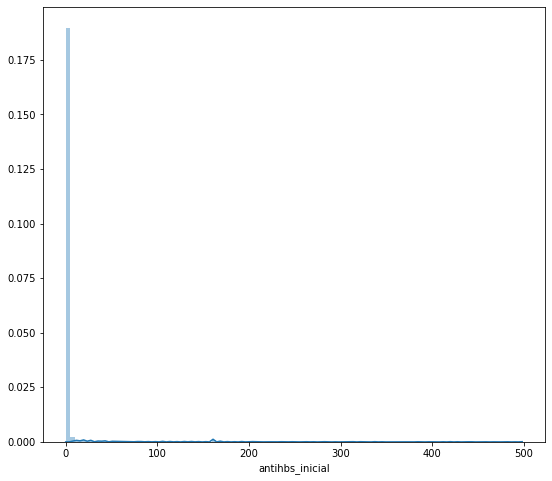

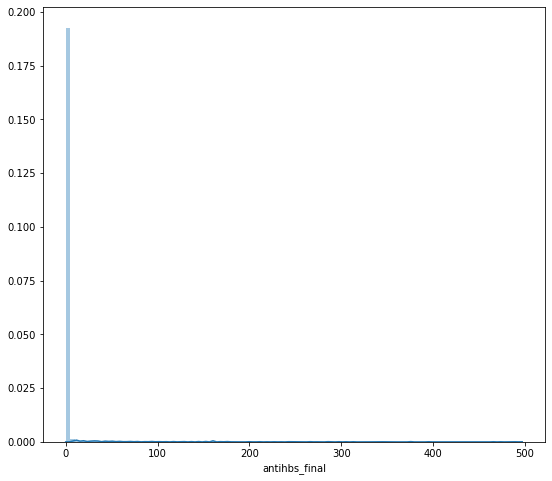

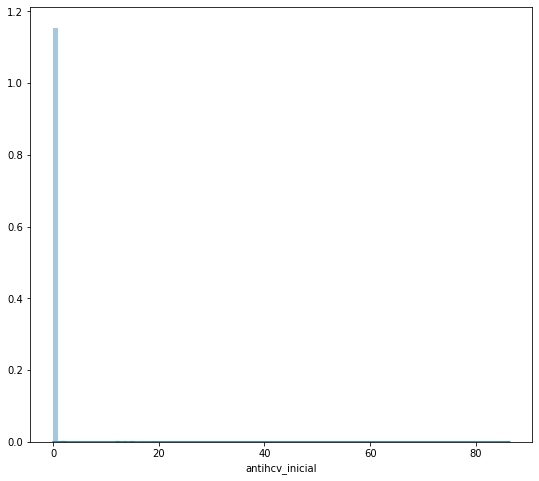

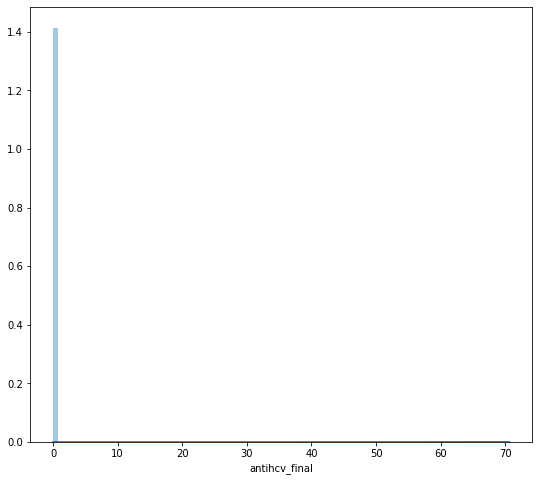

In [28]:
#gerando gráficos sobre a distribuição dos dados
for i in dic.keys():
    for coluna in dic[i].columns:
        if coluna[0:3] !='dt' and coluna[0:2]!='id' and coluna[0:3] !='dat':
            if dic[i][coluna].dtypes != object:
                plt.figure(figsize=(9, 8))
                sns.distplot(dic[i][coluna], bins=100, hist_kws={'alpha': 0.4})

In [29]:
dic[i][coluna].values

array(['0.0', '0.0', '0.0', ..., '0.0', '0.0', '0.0'], dtype=object)

In [30]:
#separando apenas as colunas com números

df_num_dados_consulta = dados_consulta.select_dtypes(include = ['float64', 'int64'])
df_num_cidade = cidade.select_dtypes(include = ['float64', 'int64'])
df_num_ubs = ubs.select_dtypes(include = ['float64', 'int64'])
df_num_aval_funcao_renal = aval_funcao_renal.select_dtypes(include = ['float64', 'int64'])
df_num_consulta_has = consulta_has.select_dtypes(include = ['float64', 'int64'])
df_num_consulta_drc = consulta_drc.select_dtypes(include = ['float64', 'int64'])
df_num_consulta_dm = consulta_dm.select_dtypes(include = ['float64', 'int64'])
df_num_calculo_tfg = calculo_tfg.select_dtypes(include = ['float64', 'int64'])
df_num_preparacao_trs = preparacao_trs.select_dtypes(include = ['float64', 'int64'])
df_num_raca = raca.select_dtypes(include = ['float64', 'int64'])
df_num_instrucao = instrucao.select_dtypes(include = ['float64', 'int64'])
df_num_paciente = paciente.select_dtypes(include = ['float64', 'int64'])
df_num_exame_fisico = exame_fisico.select_dtypes(include = ['float64', 'int64'])
df_num_avaliacao_tratamento = avaliacao_tratamento.select_dtypes(include = ['float64', 'int64'])
df_num_medicamento = medicamento.select_dtypes(include = ['float64', 'int64'])
df_num_complicacao_funcao_renal = complicacao_funcao_renal.select_dtypes(include = ['float64', 'int64'])

dic_num = {'dados_consulta':df_num_dados_consulta,'cidade':df_num_cidade,'ubs':df_num_ubs,'afr':df_num_aval_funcao_renal,
       'has':df_num_consulta_has,'drc':df_num_consulta_drc,'dm':df_num_consulta_dm,'calculo_tfg':df_num_calculo_tfg,
       'preparacao_trs':df_num_preparacao_trs,'raca':df_num_raca,'instrucao':df_num_instrucao,'paciente':df_num_paciente,'exame_fisico':df_num_exame_fisico,
       'aval_tratamento':df_num_avaliacao_tratamento,'medicamento':df_num_medicamento,'cfr':df_num_complicacao_funcao_renal
      }

for i in dic_num:
    dic_num[i]=dic_num[i].drop(columns=['id_'+i])

In [31]:
#correlação
for i in dic_num.keys():
    print('Tabela:'+ str(i))
    for colunas in dic_num[i].columns:
        print('Coluna:'+ colunas)
        df_num_corr = dic_num[i].corr()[colunas]
        golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
        print("There is {} strongly correlated values with na tabela:\n{}".format(len(golden_features_list), golden_features_list))
        print('\n')
       

Tabela:dados_consulta
Coluna:tempoAcomp
There is 1 strongly correlated values with na tabela:
tempoAcomp    1.0
Name: tempoAcomp, dtype: float64


Coluna:total_consultas_drc
There is 1 strongly correlated values with na tabela:
total_consultas_drc    1.0
Name: total_consultas_drc, dtype: float64


Coluna:total_consultas_dm
There is 1 strongly correlated values with na tabela:
total_consultas_dm    1.0
Name: total_consultas_dm, dtype: float64


Coluna:total_consultas_has
There is 1 strongly correlated values with na tabela:
total_consultas_has    1.0
Name: total_consultas_has, dtype: float64


Coluna:id_cidade
There is 12 strongly correlated values with na tabela:
id_aval_tratamento    1.0
id_medicamento        1.0
id_preparacao_trs     1.0
id_calculo_tfg        1.0
id_exame_fisico       1.0
id_cfr                1.0
id_dm                 1.0
id_drc                1.0
id_has                1.0
id_ubs                1.0
id_afr                1.0
id_cidade             1.0
Name: id_cidade,

There is 5 strongly correlated values with na tabela:
ureia_final         1.000000
creatinina_final    0.620703
ureia_inicial       0.553486
potassio_final      0.513824
fosforo_final       0.508769
Name: ureia_final, dtype: float64


Coluna:ureia24h_inicial
There is 1 strongly correlated values with na tabela:
ureia24h_inicial    1.0
Name: ureia24h_inicial, dtype: float64


Coluna:ureia24h_final
There is 1 strongly correlated values with na tabela:
ureia24h_final    1.0
Name: ureia24h_final, dtype: float64


Coluna:fosforo_inicial
There is 3 strongly correlated values with na tabela:
fosforo_inicial     1.000000
fosforo_final       0.610713
creatinina_final    0.501453
Name: fosforo_inicial, dtype: float64


Coluna:fosforo_final
There is 5 strongly correlated values with na tabela:
fosforo_final          1.000000
fosforo_inicial        0.610713
creatinina_final       0.564017
ureia_final            0.508769
pth_intacto_inicial    0.506137
Name: fosforo_final, dtype: float64


Coluna:p

There is 1 strongly correlated values with na tabela:
tfg_1_2012    1.0
Name: tfg_1_2012, dtype: float64


Coluna:tfg_2_2012
There is 1 strongly correlated values with na tabela:
tfg_2_2012    1.0
Name: tfg_2_2012, dtype: float64


Coluna:tfg_1_2013
There is 1 strongly correlated values with na tabela:
tfg_1_2013    1.0
Name: tfg_1_2013, dtype: float64


Coluna:tfg_2_2013
There is 1 strongly correlated values with na tabela:
tfg_2_2013    1.0
Name: tfg_2_2013, dtype: float64


Coluna:tfg_1_2014
There is 1 strongly correlated values with na tabela:
tfg_1_2014    1.0
Name: tfg_1_2014, dtype: float64


Coluna:tfg_2_2014
There is 1 strongly correlated values with na tabela:
tfg_2_2014    1.0
Name: tfg_2_2014, dtype: float64


Tabela:preparacao_trs
Coluna:tgp_inicial
There is 1 strongly correlated values with na tabela:
tgp_inicial    1.0
Name: tgp_inicial, dtype: float64


Coluna:tgp_final
There is 1 strongly correlated values with na tabela:
tgp_final    1.0
Name: tgp_final, dtype: float6

There is 1 strongly correlated values with na tabela:
acido_folico_inicial    1.0
Name: acido_folico_inicial, dtype: float64


Coluna:acido_folico_final
There is 1 strongly correlated values with na tabela:
acido_folico_final    1.0
Name: acido_folico_final, dtype: float64


Coluna:bilirrubina_inicial
There is 2 strongly correlated values with na tabela:
bilirrubina_inicial    1.000000
bilirrubina_final      0.674327
Name: bilirrubina_inicial, dtype: float64


Coluna:bilirrubina_final
There is 2 strongly correlated values with na tabela:
bilirrubina_final      1.000000
bilirrubina_inicial    0.674327
Name: bilirrubina_final, dtype: float64


Coluna:vitaminaB12_inicial
There is 1 strongly correlated values with na tabela:
vitaminaB12_inicial    1.0
Name: vitaminaB12_inicial, dtype: float64


Coluna:vitaminaB12_final
There is 1 strongly correlated values with na tabela:
vitaminaB12_final    1.0
Name: vitaminaB12_final, dtype: float64


Coluna:colest_hdl_inicial
There is 4 strongly correl

In [34]:
#dic[i][dic[i][j].values != 0]

coluna_dados_consulta = dic['complicacao_funcao_renal']['dt_ferritina_final']
coluna_dados_consulta = coluna_dados_consulta[coluna_dados_consulta.values != '0.0']
coluna_dados_consulta.describe()

count          617
unique         458
top       7/out/15
freq             5
Name: dt_ferritina_final, dtype: object

In [53]:
##Seprar as colunas com linhas que tenham valor =0 ou null
dic_snulo = {}
for i in dic.keys():
    for j in dic[i].columns:
        coluna_consulta = dic[i][j]
        if type(coluna_consulta) ==object:
            coluna_aux = coluna_consulta[coluna_consulta.values != '0' and coluna_consulta.values != '0.0' ]
        elif type(coluna_consulta) == float:
            coluna_aux = coluna_consulta[coluna_consulta.values != 0.00 or coluna_consulta.values != 0.0]
        else: 
            coluna_aux = coluna_consulta[coluna_consulta.values != 0]
        dic_snulo[j] = coluna_aux
        

In [54]:
dic_snulo

{'id_dados_consulta': 0          1
 1          2
 2          3
 3          4
 4          5
 5          6
 6          7
 7          8
 8          9
 9         10
 10        11
 11        12
 12        13
 13        14
 14        15
 15        16
 16        17
 17        18
 18        19
 19        20
 20        21
 21        22
 22        23
 23        24
 24        25
 25        26
 26        27
 27        28
 28        29
 29        30
         ... 
 7236    7237
 7237    7238
 7238    7239
 7239    7240
 7240    7241
 7241    7242
 7242    7243
 7243    7244
 7244    7245
 7245    7246
 7246    7247
 7247    7248
 7248    7249
 7249    7250
 7250    7251
 7251    7252
 7252    7253
 7253    7254
 7254    7255
 7255    7256
 7256    7257
 7257    7258
 7258    7259
 7259    7260
 7260    7261
 7261    7262
 7262    7263
 7263    7264
 7264    7265
 7265    7266
 Name: id_dados_consulta, Length: 7266, dtype: int64,
 'data_inicial': 0        2/ago/10
 1        3/ago/10
 2        3/ago/1

In [55]:
#Estatistica sem valor 0
for i in dic.keys():    
    for coluna in dic[i].columns:
        if coluna[0:3] !='dt' and coluna[0:2]!='id' and coluna[0:3] !='dat':
            print('Tabela que está sendo analisada:'+ i)
            print(dic_snulo[coluna].describe())

Tabela que está sendo analisada:dados_consulta
count    5054.000000
mean       17.764939
std        14.320183
min         1.000000
25%         5.000000
50%        14.000000
75%        29.000000
max        51.000000
Name: tempoAcomp, dtype: float64
Tabela que está sendo analisada:dados_consulta
count    2755.000000
mean        2.601452
std         2.352736
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        20.000000
Name: total_consultas_drc, dtype: float64
Tabela que está sendo analisada:dados_consulta
count    3767.000000
mean        2.523228
std         3.143400
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       124.000000
Name: total_consultas_dm, dtype: float64
Tabela que está sendo analisada:dados_consulta
count    2860.000000
mean        2.609790
std         2.445812
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        26.000000
Name: total_consultas_ha

count    1005.000000
mean       31.925224
std         4.717693
min         2.200000
25%        29.000000
50%        32.000000
75%        35.000000
max        52.000000
Name: ecoao_inicial, dtype: float64
Tabela que está sendo analisada:aval_funcao_renal
count     7266
unique     525
top        0.0
freq      6261
Name: dt_ecoao_inicial, dtype: object
Tabela que está sendo analisada:aval_funcao_renal
count    165.000000
mean      32.424242
std        4.568118
min       18.000000
25%       29.000000
50%       32.000000
75%       35.000000
max       49.000000
Name: ecoao_final, dtype: float64
Tabela que está sendo analisada:aval_funcao_renal
count     7266
unique     139
top        0.0
freq      7101
Name: dt_ecoao_final, dtype: object
Tabela que está sendo analisada:aval_funcao_renal
count    996.000000
mean      10.248896
std        2.222749
min        0.900000
25%        9.000000
50%       10.000000
75%       12.000000
max       25.000000
Name: ecosiv_inicial, dtype: float64
Tabela que 

count                       7266
unique                        10
top       Fundamental Incompleto
freq                        4346
Name: nome, dtype: object
Tabela que está sendo analisada:instrucao
count                       7266
unique                        10
top       Fundamental Incompleto
freq                        4346
Name: nome, dtype: object
Tabela que está sendo analisada:paciente
count         7266
unique           3
top       Feminino
freq          4299
Name: sexo, dtype: object
Tabela que está sendo analisada:paciente
count    1317.000000
mean        1.597289
std         1.233359
min         0.010000
25%         1.000000
50%         1.140000
75%         1.840000
max        19.080000
Name: renda_sm, dtype: float64
Tabela que está sendo analisada:paciente
count    2861.000000
mean        2.451615
std         1.713326
min         0.010000
25%         1.240000
50%         2.110000
75%         3.020000
max        23.900000
Name: renda_familiar_sm, dtype: float64
Tabela que

count    2681.000000
mean        5.887520
std         1.874258
min         0.480000
25%         4.500000
50%         5.700000
75%         7.090000
max        12.900000
Name: acido_urico_final, dtype: float64
Tabela que está sendo analisada:complicacao_funcao_renal
count     7266
unique    1031
top        0.0
freq      4590
Name: dt_acido_urico_final, dtype: object
Tabela que está sendo analisada:complicacao_funcao_renal
count    1449.000000
mean      156.651781
std       150.559649
min         1.040000
25%        55.000000
50%       108.900000
75%       210.000000
max      1376.200000
Name: ferritina_inicial, dtype: float64
Tabela que está sendo analisada:complicacao_funcao_renal
count     7266
unique     841
top        0.0
freq      5818
Name: dt_ferritina_inicial, dtype: object
Tabela que está sendo analisada:complicacao_funcao_renal
count     617.000000
mean      163.707796
std       163.782046
min         1.590000
25%        54.360000
50%       114.800000
75%       219.000000
max  

count     7266
unique     380
top        0.0
freq      6826
Name: dt_gama_glutamil_inicial, dtype: object
Tabela que está sendo analisada:complicacao_funcao_renal
count     53.000000
mean     101.301887
std       99.709691
min       14.000000
25%       34.000000
50%       62.000000
75%      139.000000
max      354.000000
Name: gama_glutamil_final, dtype: float64
Tabela que está sendo analisada:complicacao_funcao_renal
count     7266
unique      52
top        0.0
freq      7213
Name: dt_gama_glutamil_final, dtype: object
Tabela que está sendo analisada:complicacao_funcao_renal
count    5897.000000
mean      176.960166
std       140.473593
min         7.000000
25%        99.000000
50%       140.000000
75%       207.000000
max      1893.000000
Name: triglicerides_inicial, dtype: float64
Tabela que está sendo analisada:complicacao_funcao_renal
count     7266
unique    1335
top        0.0
freq      1371
Name: dt_triglicerides_inicial, dtype: object
Tabela que está sendo analisada:complicaca

In [ ]:
#finalizar conexão com o banco
cursor.close() 
con.close()